In [26]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("white")

In [27]:
scenario_df = pd.read_csv("../scenario_master_list.csv")
scenario_df = scenario_df[scenario_df["archetype"]=="Southern"].reset_index(drop=True)

In [62]:
df = pd.read_csv("endpoints_a71e7b31-559d-eb11-a2ce-c4346bcb1550.csv")
df2 = pd.read_csv("endpoints_b7cd3df7-24a2-eb11-a2ce-c4346bcb1550.csv") #extra ITN scenario
df = pd.concat([df,df2])
df_baseline = df[df["scenario_number"]==30].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
df_allout = df[df["scenario_number"]==27].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()

df_agg = df.groupby(["burnin_approx_pfpr2_10", "scenario_number"]).agg("mean").reset_index()

df_agg_w_baseline = df_agg.merge(df_baseline, on="burnin_approx_pfpr2_10", suffixes=["","_BASELINE"], how="left")

In [63]:
df_baseline.groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()

burnin_approx_pfpr2_10   pfpr0_5  pfpr2_10  pfpr6_15  pfpr16_500  pfpr_all  \
0                    0.05  0.057555  0.110630  0.158023    0.131493  0.124321   
1                    0.15  0.142523  0.233627  0.294045    0.181043  0.201660   
2                    0.25  0.221492  0.318302  0.377723    0.199189  0.245805   
3                    0.35  0.286096  0.396764  0.451907    0.211746  0.282967   

   clinical_incidence0_5  clinical_incidence2_10  clinical_incidence6_15  \
0               0.841522                1.034085                1.134369   
1               1.945703                2.081437                1.879806   
2               2.940999                2.847391                2.242526   
3               3.823611                3.403836                2.404738   

   clinical_incidence16_500  ...  scenario_number  smc_on  \
0                  0.535230  ...             30.0   False   
1                  0.517361  ...             30.0   False   
2                  0.398027  ...             30.0   False   
3                  0.296311  ...             30.0   False   

   within_school_coverage  Received_Treatment  Received_Test  \
0                     0.9              2582.8            0.0   
1                     0.9              4745.0            0.0   
2                     0.9              6169.9            0.0   
3                     0.9              7332.0            0.0   

   Received_Campaign_Drugs  Received_RCD_Drugs  Received_SMC  \
0                      0.0                 0.0           0.0   
1                      0.0                 0.0           0.0   
2                      0.0                 0.0           0.0   
3                      0.0                 0.0           0.0   

   Received_Ivermectin  Received_Primaquine  
0                  0.0                  0.0  
1                  0.0                  0.0  
2                  0.0                  0.0  
3                  0.0                  0.0  

[4 rows x 39 columns]

# IPT vs VC

Text(0, 0.5, 'PfPR2-10 with additional intervention')

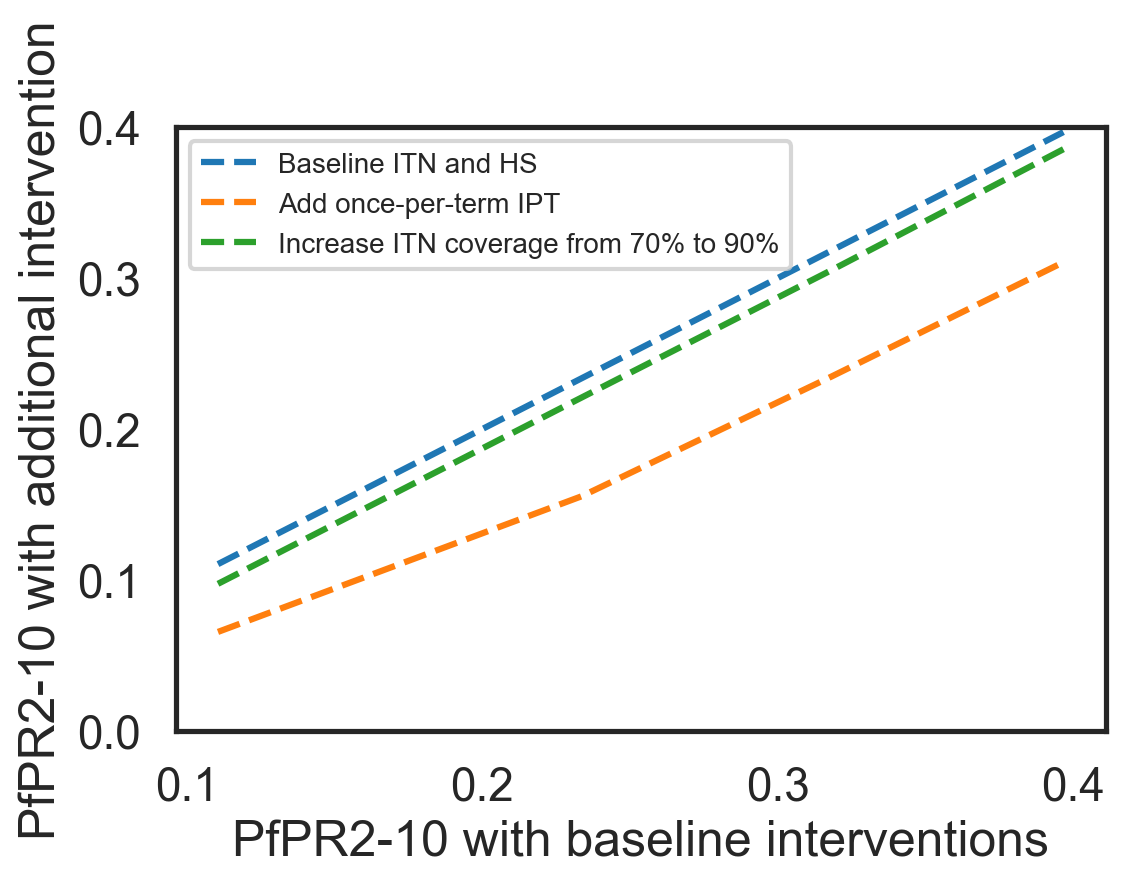

In [30]:
# Default IPT vs higher ITN coverage:
plt.figure(dpi=200)
plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_baseline["pfpr2_10"]), linestyle='dashed', label="Baseline ITN and HS")
# plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_allout["pfpr2_10"]), linestyle='dashed')

# Scenario 13: Southern,DP,IPT,term,default,default,0.9,0.15,default,False,13
s1 = df_agg_w_baseline[df_agg_w_baseline["scenario_number"]==13]
# Scenario 31: Southern,None,None,None,high,default,0.9,0.15,default,False,31
s2 = df_agg_w_baseline[df_agg_w_baseline["scenario_number"]==31]

plt.plot(s1["pfpr2_10_BASELINE"], s1["pfpr2_10"], linestyle='dashed', label="Add once-per-term IPT")
plt.plot(s2["pfpr2_10_BASELINE"], s2["pfpr2_10"], linestyle='dashed', label="Increase ITN coverage from 70% to 90%")

plt.legend(fontsize=10)
plt.ylim([0,0.4])

plt.xlabel("PfPR2-10 with baseline interventions")
plt.ylabel("PfPR2-10 with additional intervention")
# plt.plot( baseline

Text(0, 0.5, 'Prevalence (all-ages) with additional intervention')

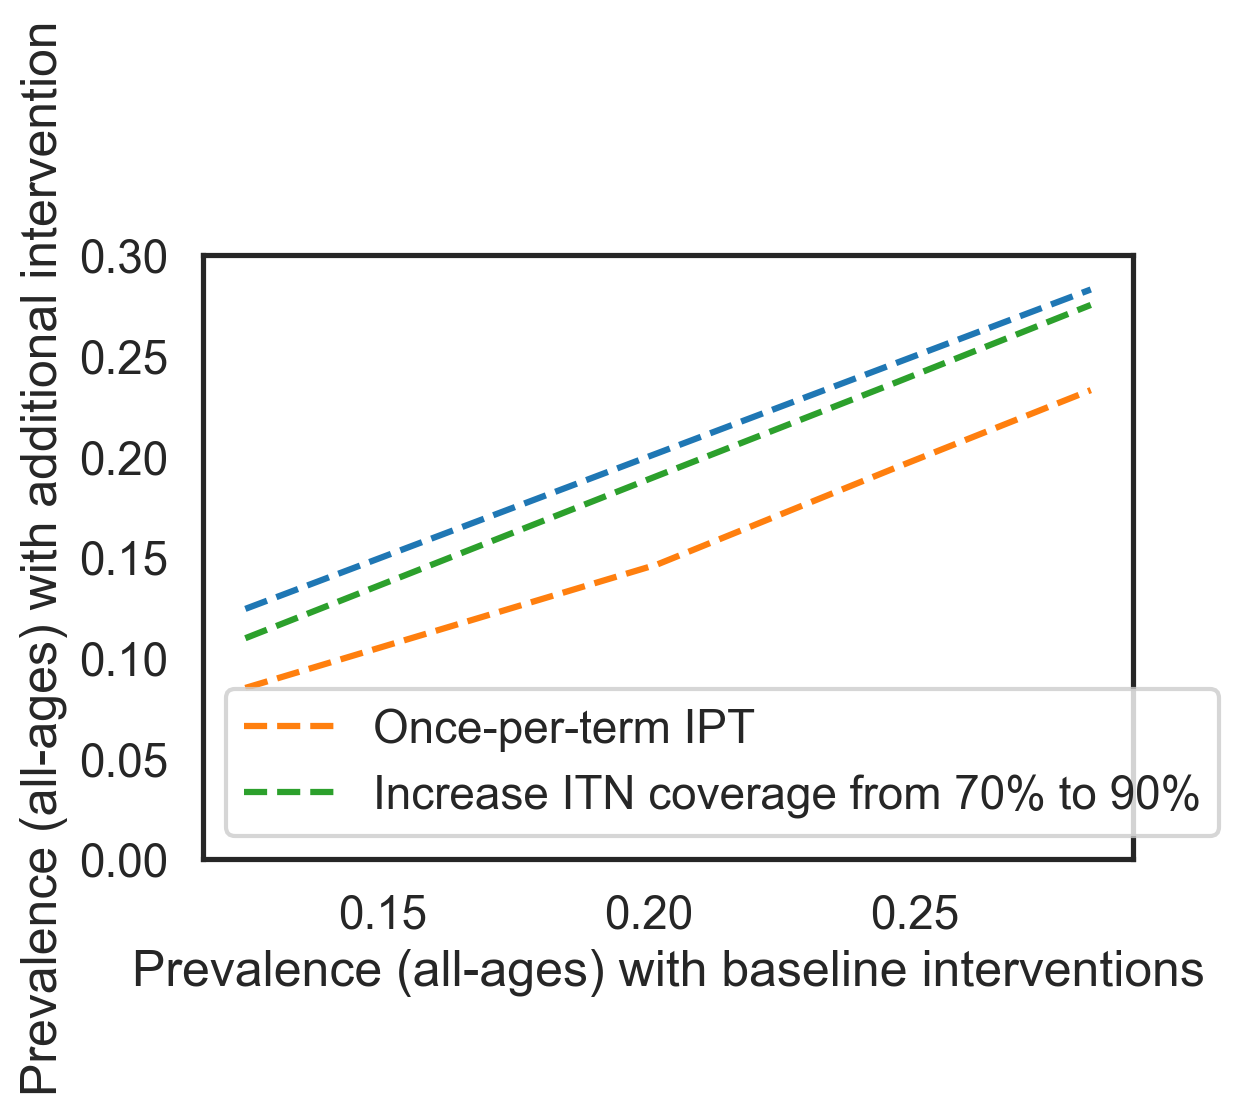

In [31]:
# Default IPT vs higher ITN coverage:
plt.figure(dpi=200)
plt.plot(np.array(df_baseline["pfpr_all"]), np.array(df_baseline["pfpr_all"]), linestyle='dashed')
# plt.plot(np.array(df_baseline["pfpr2_10"]), np.array(df_allout["pfpr2_10"]), linestyle='dashed')

# Scenario 13: Southern,DP,IPT,term,default,default,0.9,0.15,default,False,13
s1 = df_agg_w_baseline[df_agg_w_baseline["scenario_number"]==13]
# Scenario 31: Southern,None,None,None,high,default,0.9,0.15,default,False,31
s2 = df_agg_w_baseline[df_agg_w_baseline["scenario_number"]==31]

plt.plot(s1["pfpr_all_BASELINE"], s1["pfpr_all"], linestyle='dashed', label="Once-per-term IPT")
plt.plot(s2["pfpr_all_BASELINE"], s2["pfpr_all"], linestyle='dashed', label="Increase ITN coverage from 70% to 90%")

plt.legend()
plt.ylim([0,0.3])

plt.xlabel("Prevalence (all-ages) with baseline interventions")
plt.ylabel("Prevalence (all-ages) with additional intervention")

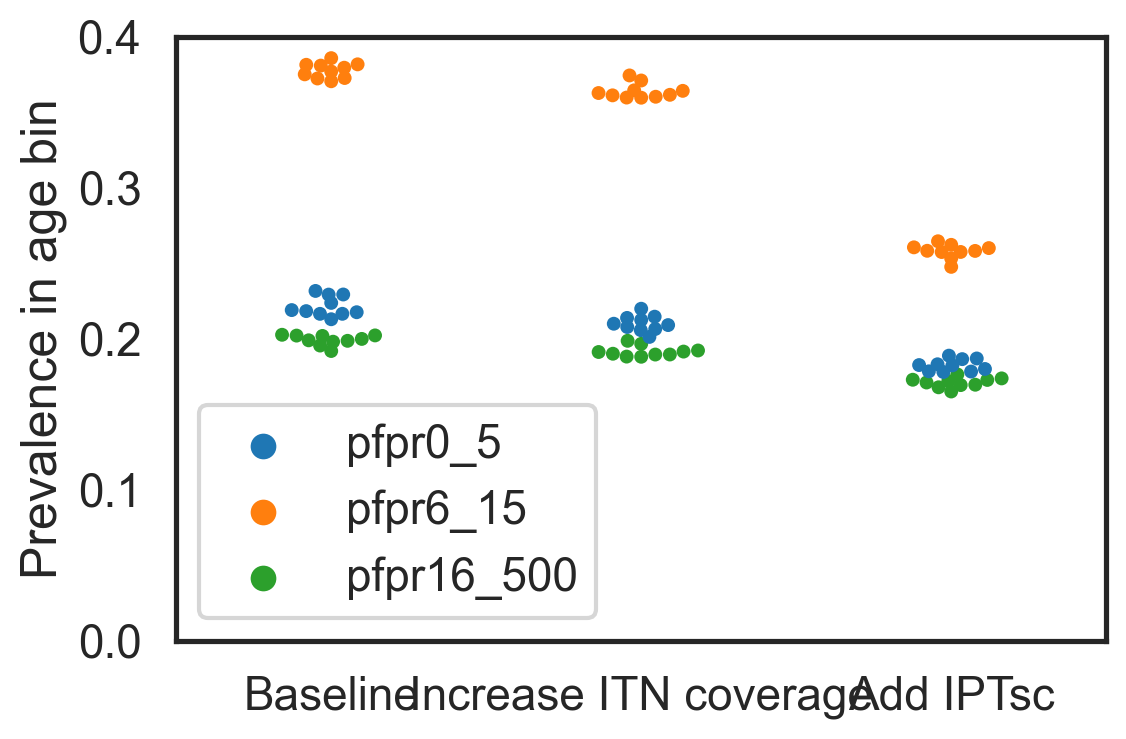

In [32]:
# Prevalence by age
ax = plt.figure(dpi=200)

# Scenario 13: Southern,DP,IPT,term,default,default,0.9,0.15,default,False,13
# Scenario 31: Southern,None,None,None,high,default,0.9,0.15,default,False,31
# Scenario 30 is baseline: Southern,None,None,None,default,default,0.9,0.0,default,False,30

df_plot = df[np.in1d(df["scenario_number"], [13,30,31])]
df_plot = df_plot[df_plot["burnin_approx_pfpr2_10"]==0.25]
df_plot_melt = pd.melt(df_plot, id_vars=['scenario_number'], value_vars=['pfpr0_5','pfpr6_15','pfpr16_500'])

sns.swarmplot(x="scenario_number", y="value", hue="variable", data=df_plot_melt, order=[30,31,13])
# plt.yticks
# plt.plot(s1["pfpr_all_BASELINE"], s1["pfpr_all"], linestyle='dashed', label="Once-per-term IPT")
# plt.plot(s2["pfpr_all_BASELINE"], s2["pfpr_all"], linestyle='dashed', label="Increase ITN coverage from 70% to 90%")

# plt.legend()
plt.ylim([0,0.4])
# ax.set_xticklabels(['zero','two','four'])
plt.xticks(ticks=[0,1,2],labels=['Baseline','Increase ITN coverage','Add IPTsc'])
plt.xlabel(None)
plt.ylabel("Prevalence in age bin")
plt.legend(title=None)

# plt.xlabel("Prevalence (all-ages) with baseline interventions")
# plt.ylabel("Prevalence (all-ages) with additional intervention")

In [33]:
df_plot = df_agg_w_baseline[np.in1d(df_agg_w_baseline["scenario_number"], [13,30,31])]

In [34]:
df_plot

burnin_approx_pfpr2_10  scenario_number   pfpr0_5  pfpr2_10  pfpr6_15  \
13                     0.05               13  0.040960  0.065735  0.088912   
30                     0.05               30  0.057555  0.110630  0.158023   
31                     0.05               31  0.051075  0.097579  0.140846   
51                     0.15               13  0.109029  0.155506  0.183830   
68                     0.15               30  0.142523  0.233627  0.294045   
69                     0.15               31  0.134659  0.220886  0.278812   
89                     0.25               13  0.182511  0.234888  0.257967   
106                    0.25               30  0.221492  0.318302  0.377723   
107                    0.25               31  0.210109  0.305353  0.363937   
127                    0.35               13  0.248891  0.310578  0.327075   
144                    0.35               30  0.286096  0.396764  0.451907   
145                    0.35               31  0.275800  0.385405  0.442381   

     pfpr16_500  pfpr_all  clinical_incidence0_5  clinical_incidence2_10  \
13     0.097672  0.085055               0.579146                0.665860   
30     0.131493  0.124321               0.841522                1.034085   
31     0.115636  0.109751               0.712734                0.905338   
51     0.142503  0.146436               1.498928                1.433082   
68     0.181043  0.201660               1.945703                2.081437   
69     0.170310  0.190438               1.832973                1.970102   
89     0.171069  0.193853               2.486758                2.054059   
106    0.199189  0.245805               2.940999                2.847391   
107    0.191584  0.236164               2.813174                2.719759   
127    0.188481  0.232982               3.343321                2.452043   
144    0.211746  0.282967               3.823611                3.403836   
145    0.205764  0.275296               3.682734                3.311988   

     clinical_incidence6_15  ...  scenario_number_BASELINE  smc_on_BASELINE  \
13                 0.662621  ...                      30.0            False   
30                 1.134369  ...                      30.0            False   
31                 1.025351  ...                      30.0            False   
51                 1.129436  ...                      30.0            False   
68                 1.879806  ...                      30.0            False   
69                 1.796172  ...                      30.0            False   
89                 1.245696  ...                      30.0            False   
106                2.242526  ...                      30.0            False   
107                2.149950  ...                      30.0            False   
127                1.242687  ...                      30.0            False   
144                2.404738  ...                      30.0            False   
145                2.382972  ...                      30.0            False   

     within_school_coverage_BASELINE  Received_Treatment_BASELINE  \
13                               0.9                       2582.8   
30                               0.9                       2582.8   
31                               0.9                       2582.8   
51                               0.9                       4745.0   
68                               0.9                       4745.0   
69                               0.9                       4745.0   
89                               0.9                       6169.9   
106                              0.9                       6169.9   
107                              0.9                       6169.9   
127                              0.9                       7332.0   
144                              0.9                       7332.0   
145                              0.9                       7332.0   

     Received_Test_BASELINE  Received_Campaign_Drugs_BASELINE  \
13        

In [35]:
pd.melt(df_plot, id_vars=['scenario_number'], value_vars=['pfpr0_5','pfpr6_15','pfpr16_500'])

scenario_number    variable     value
0                13     pfpr0_5  0.040960
1                30     pfpr0_5  0.057555
2                31     pfpr0_5  0.051075
3                13     pfpr0_5  0.109029
4                30     pfpr0_5  0.142523
5                31     pfpr0_5  0.134659
6                13     pfpr0_5  0.182511
7                30     pfpr0_5  0.221492
8                31     pfpr0_5  0.210109
9                13     pfpr0_5  0.248891
10               30     pfpr0_5  0.286096
11               31     pfpr0_5  0.275800
12               13    pfpr6_15  0.088912
13               30    pfpr6_15  0.158023
14               31    pfpr6_15  0.140846
15               13    pfpr6_15  0.183830
16               30    pfpr6_15  0.294045
17               31    pfpr6_15  0.278812
18               13    pfpr6_15  0.257967
19               30    pfpr6_15  0.377723
20               31    pfpr6_15  0.363937
21               13    pfpr6_15  0.327075
22               30    pfpr6_15  0.451907
23               31    pfpr6_15  0.442381
24               13  pfpr16_500  0.097672
25               30  pfpr16_500  0.131493
26               31  pfpr16_500  0.115636
27               13  pfpr16_500  0.142503
28               30  pfpr16_500  0.181043
29               31  pfpr16_500  0.170310
30               13  pfpr16_500  0.171069
31               30  pfpr16_500  0.199189
32               31  pfpr16_500  0.191584
33               13  pfpr16_500  0.188481
34               30  pfpr16_500  0.211746
35               31  pfpr16_500  0.205764

# IPT modality

## Within school coverage

In [36]:
def modality_plot_by_group(scenarios, label_dict, suptitle=None, color_dict=None, linestyle_dict=None):
    plt.close("all")
    plt.figure(dpi=300, figsize=(10,5))
    
    metrics = ["pfpr0_5", "pfpr6_15", "pfpr16_500"]
    
    s_dict = {}
    for s in scenarios:
        s_dict[s] = df_agg_w_baseline[df_agg_w_baseline["scenario_number"]==s]
    
    for i in range(3):
        metric = metrics[i]
        ax = plt.subplot(1,3,i+1)
        
        if metric == "pfpr0_5":
            plt.ylim([0,0.55])
        elif metric == "pfpr6_15":
            plt.ylim([0,0.55])
        elif metric == "pfpr16_500":
            plt.ylim([0,0.55])
        
        for s in scenarios:
            linestyle='solid'
            c = None
            if s == 30:
                linestyle='dashed'
                c = 'gray'
            else:
                if color_dict:
                    c = color_dict[s]
                if linestyle_dict:
                    linestyle = linestyle_dict[s]
                
            x = s_dict[s]["{}_BASELINE".format(metric)]
            y = s_dict[s][metric]
            plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)

        if i == 2:
            plt.legend(fontsize=10)
        plt.xlabel("Baseline prevalence".format(metric))
        plt.ylabel(metric)
#         plt.title(metric)

    plt.suptitle(suptitle)
    plt.tight_layout()
    plt.show()

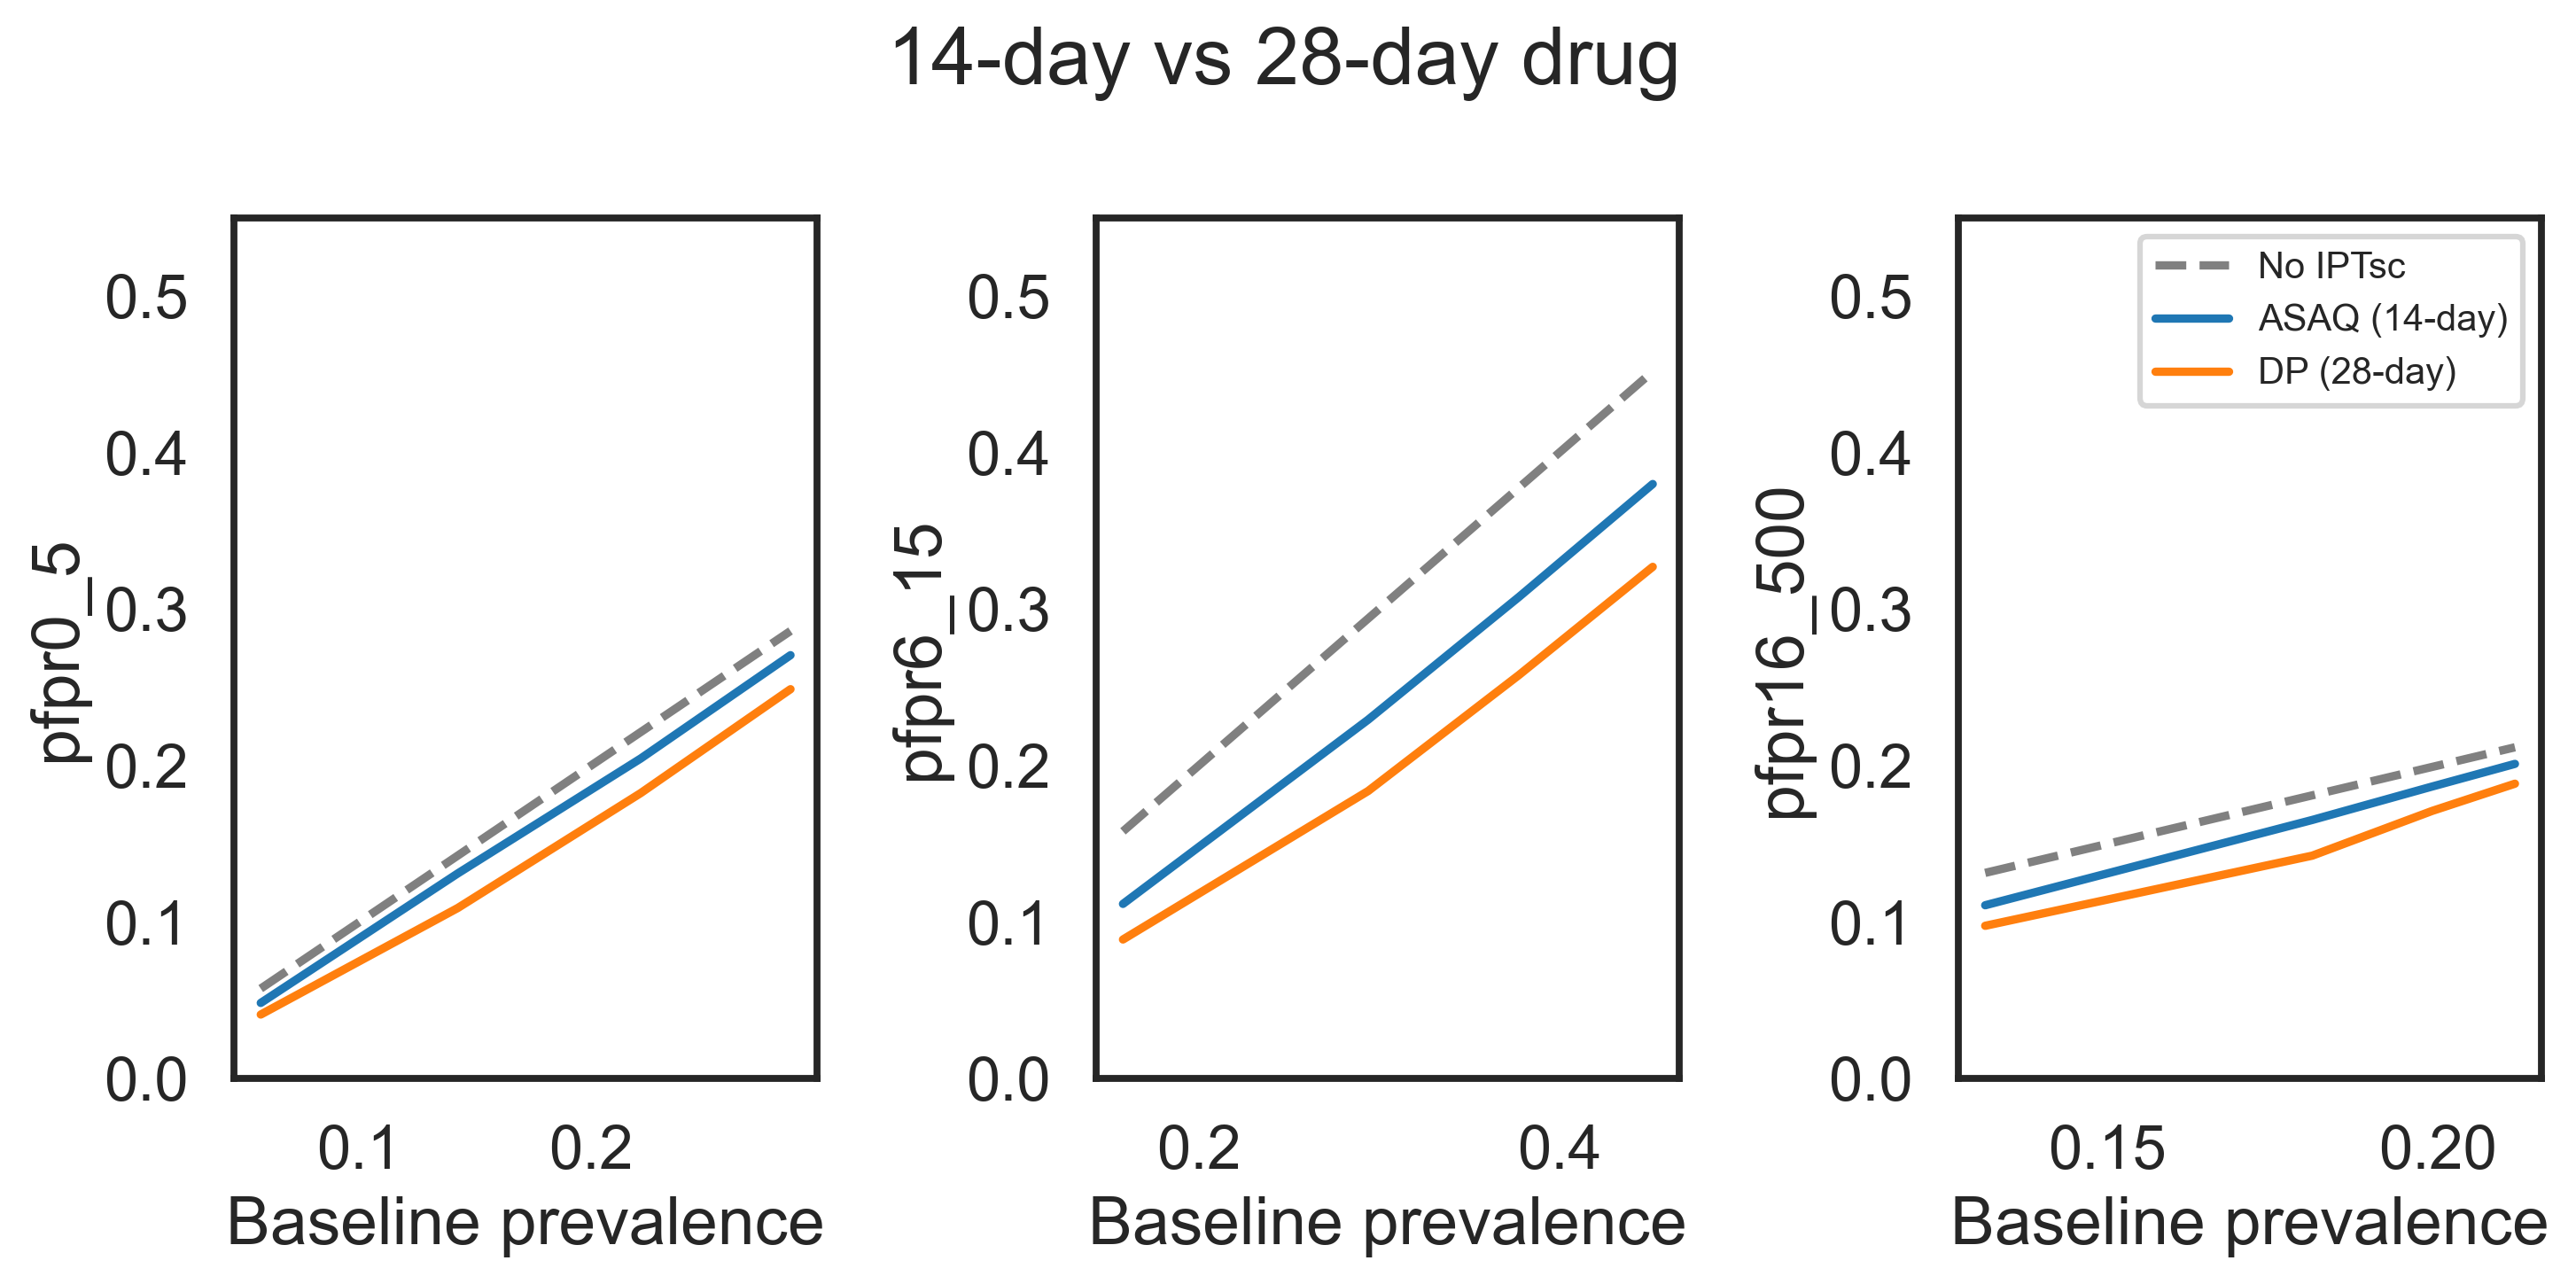

In [37]:
scenario_dict = {
    30: "No IPTsc",
    13: "DP (28-day)",
    1: "ASAQ (14-day)"
}
modality_plot_by_group([30,1,13], scenario_dict, suptitle="14-day vs 28-day drug")

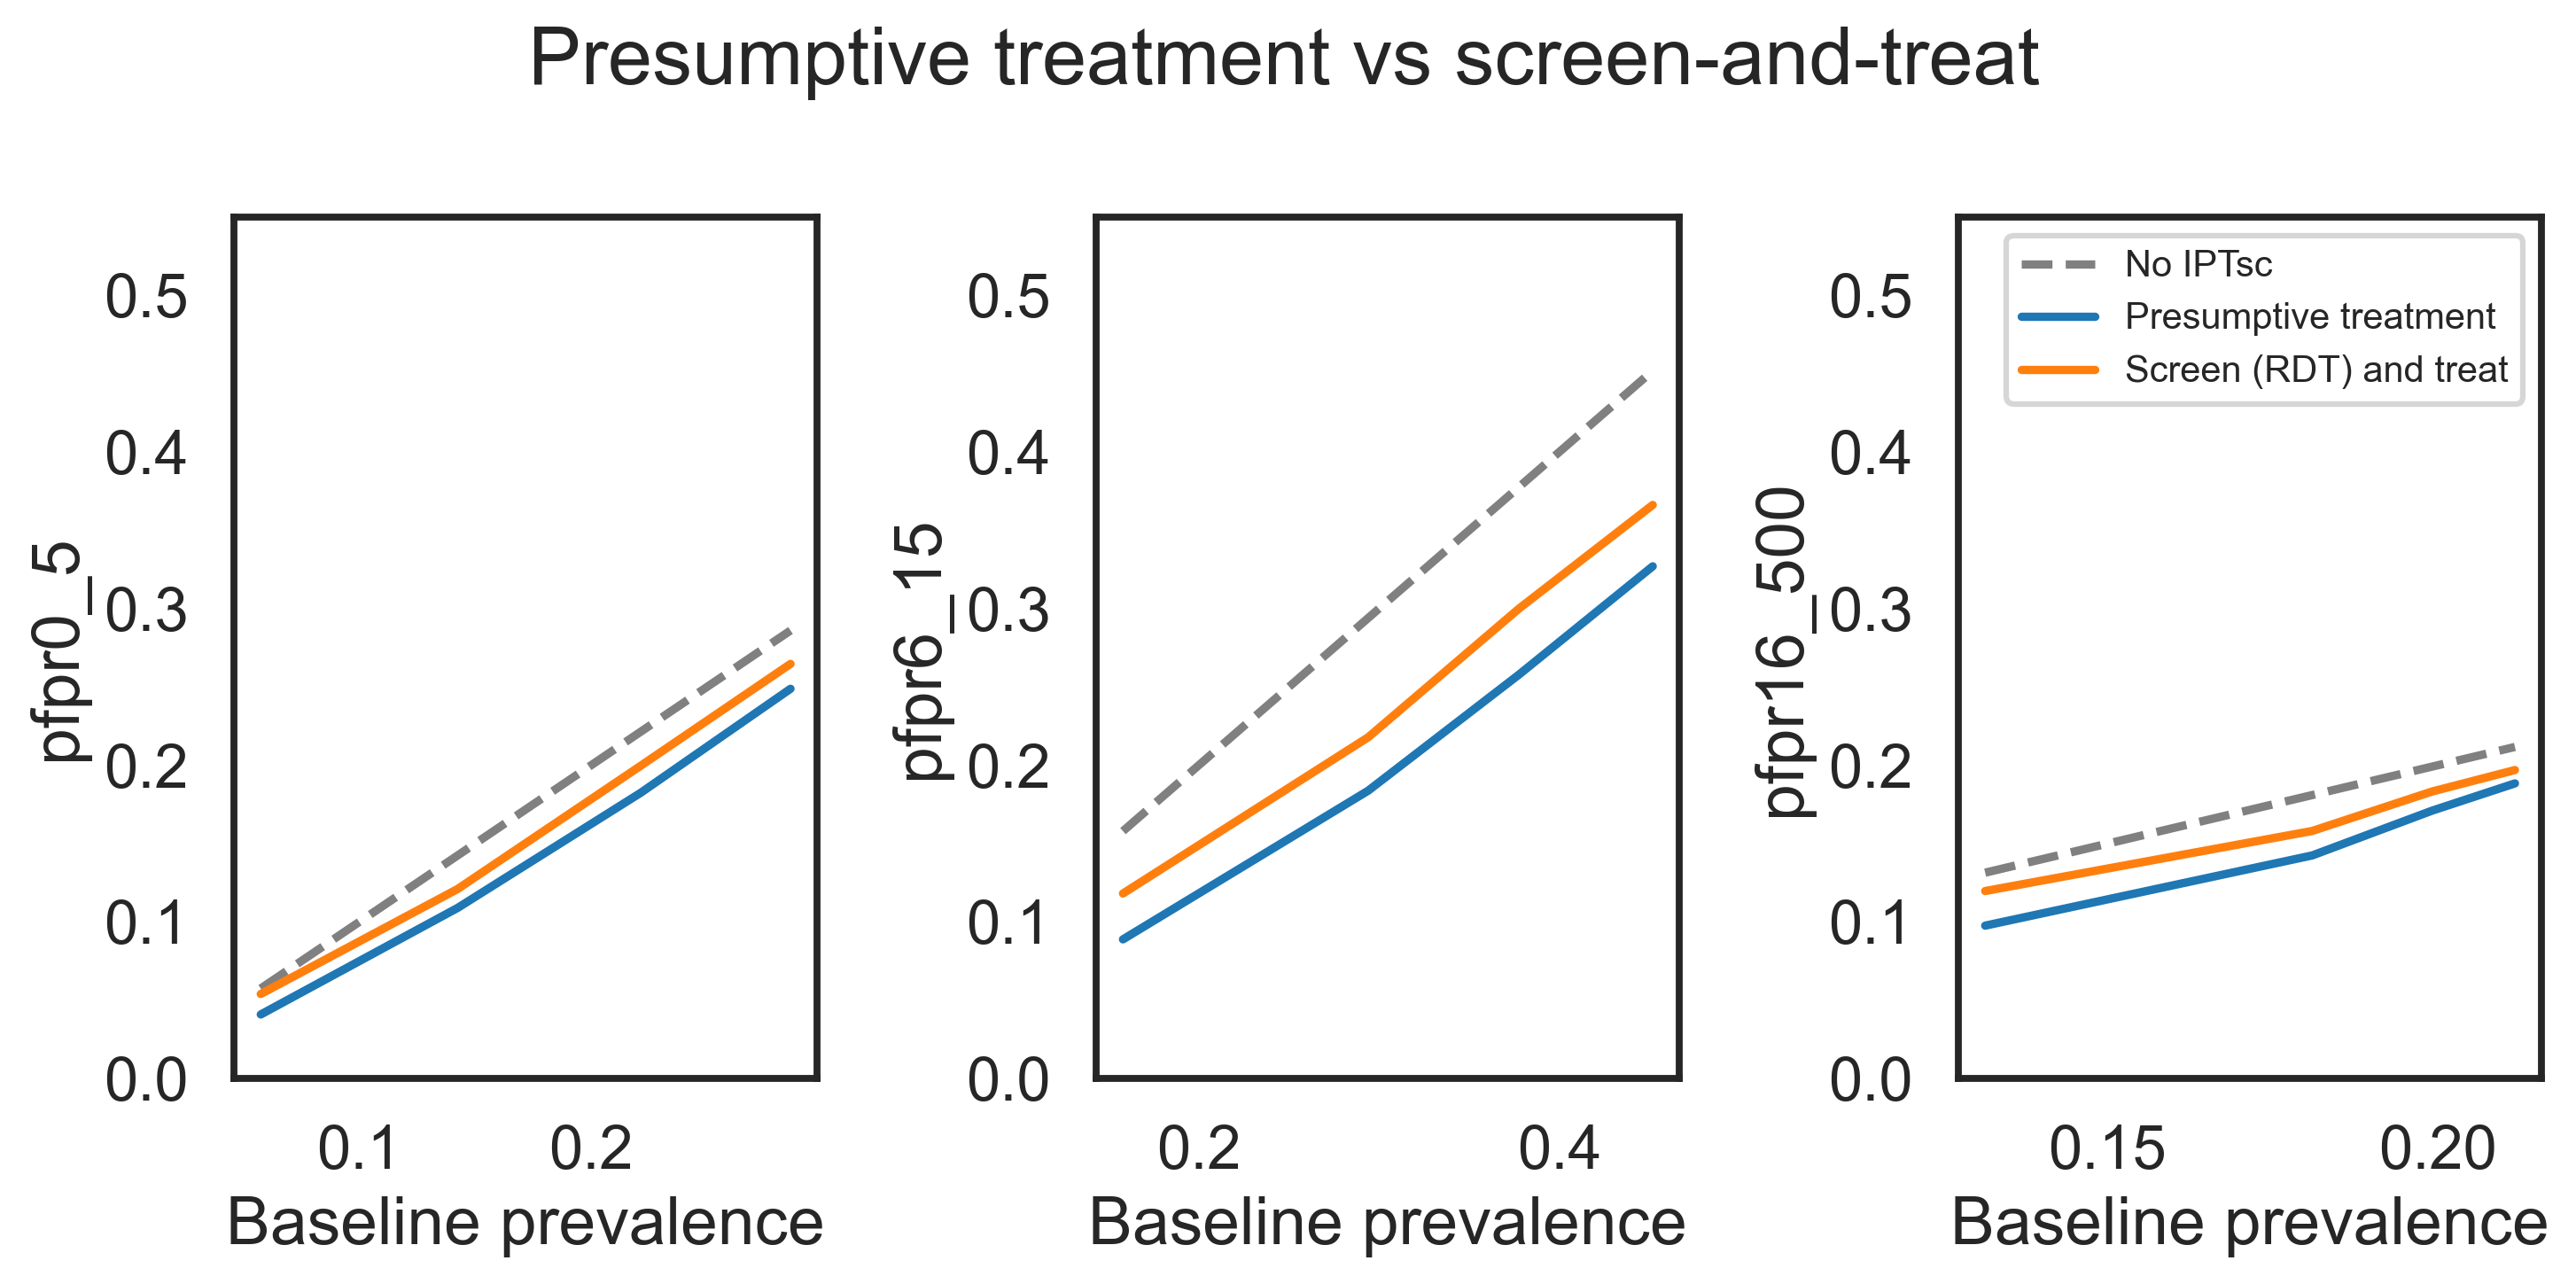

In [38]:
scenario_dict = {
    30: "No IPTsc",
    13: "Presumptive treatment",
    19: "Screen (RDT) and treat"
}

modality_plot_by_group(list(scenario_dict.keys()), scenario_dict, suptitle="Presumptive treatment vs screen-and-treat")

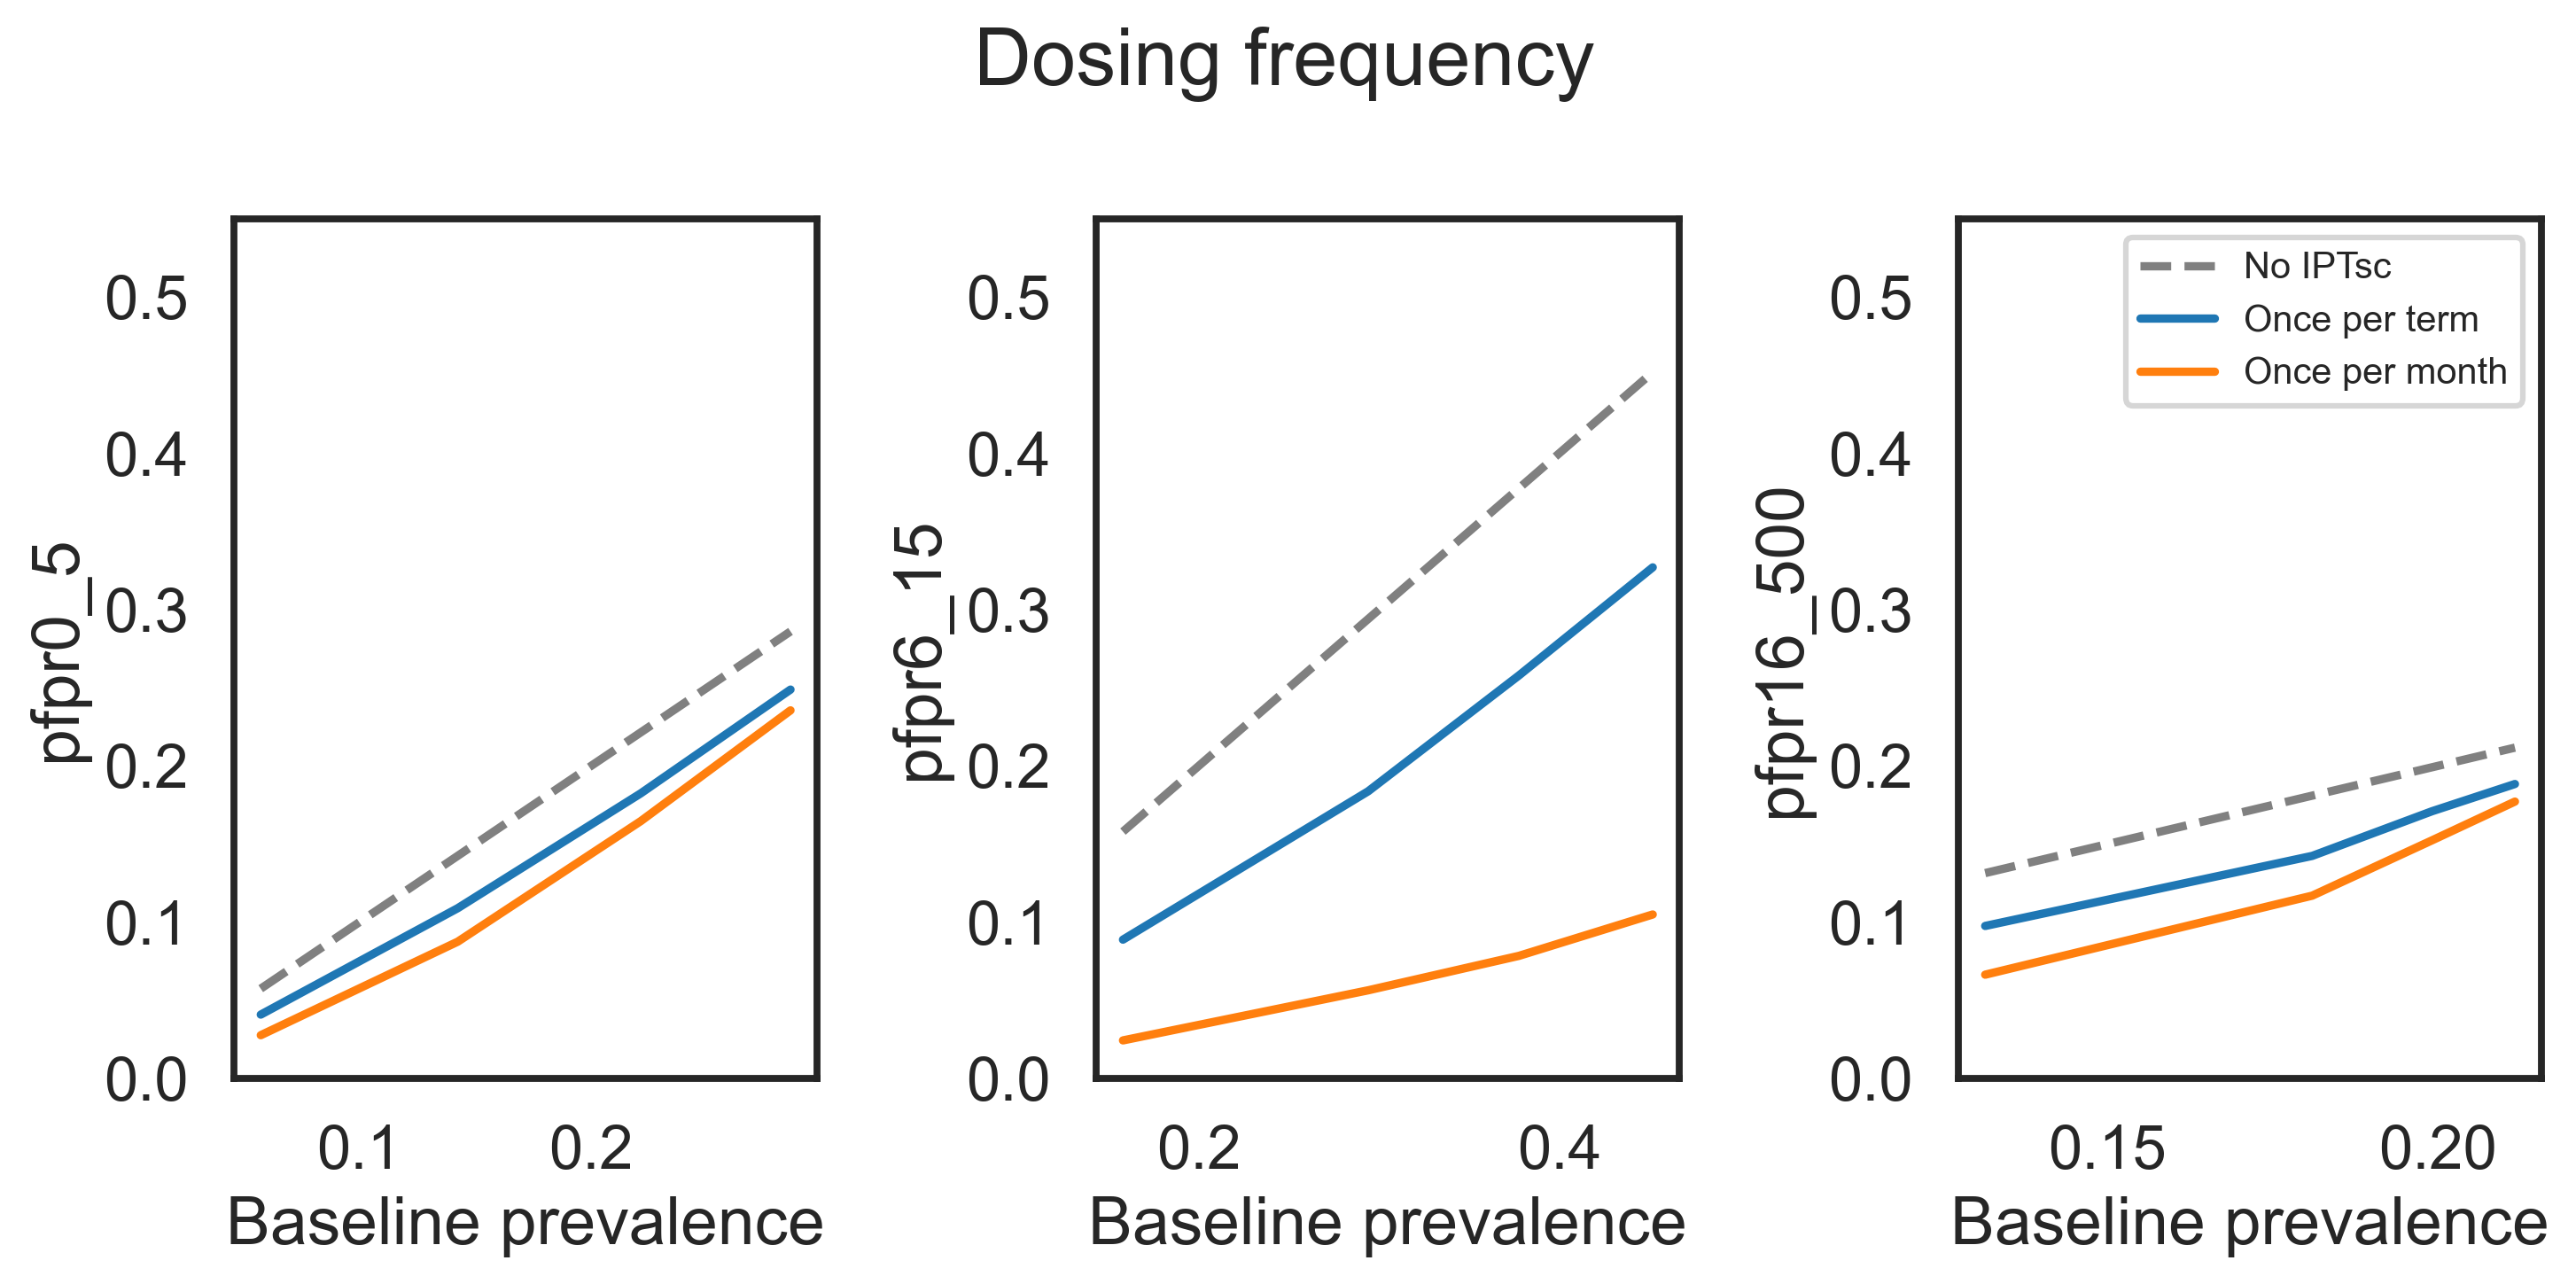

In [39]:
scenario_dict = {
    30: "No IPTsc",
    13: "Once per term",
    16: "Once per month"
}

modality_plot_by_group(list(scenario_dict.keys()), scenario_dict, suptitle="Dosing frequency")

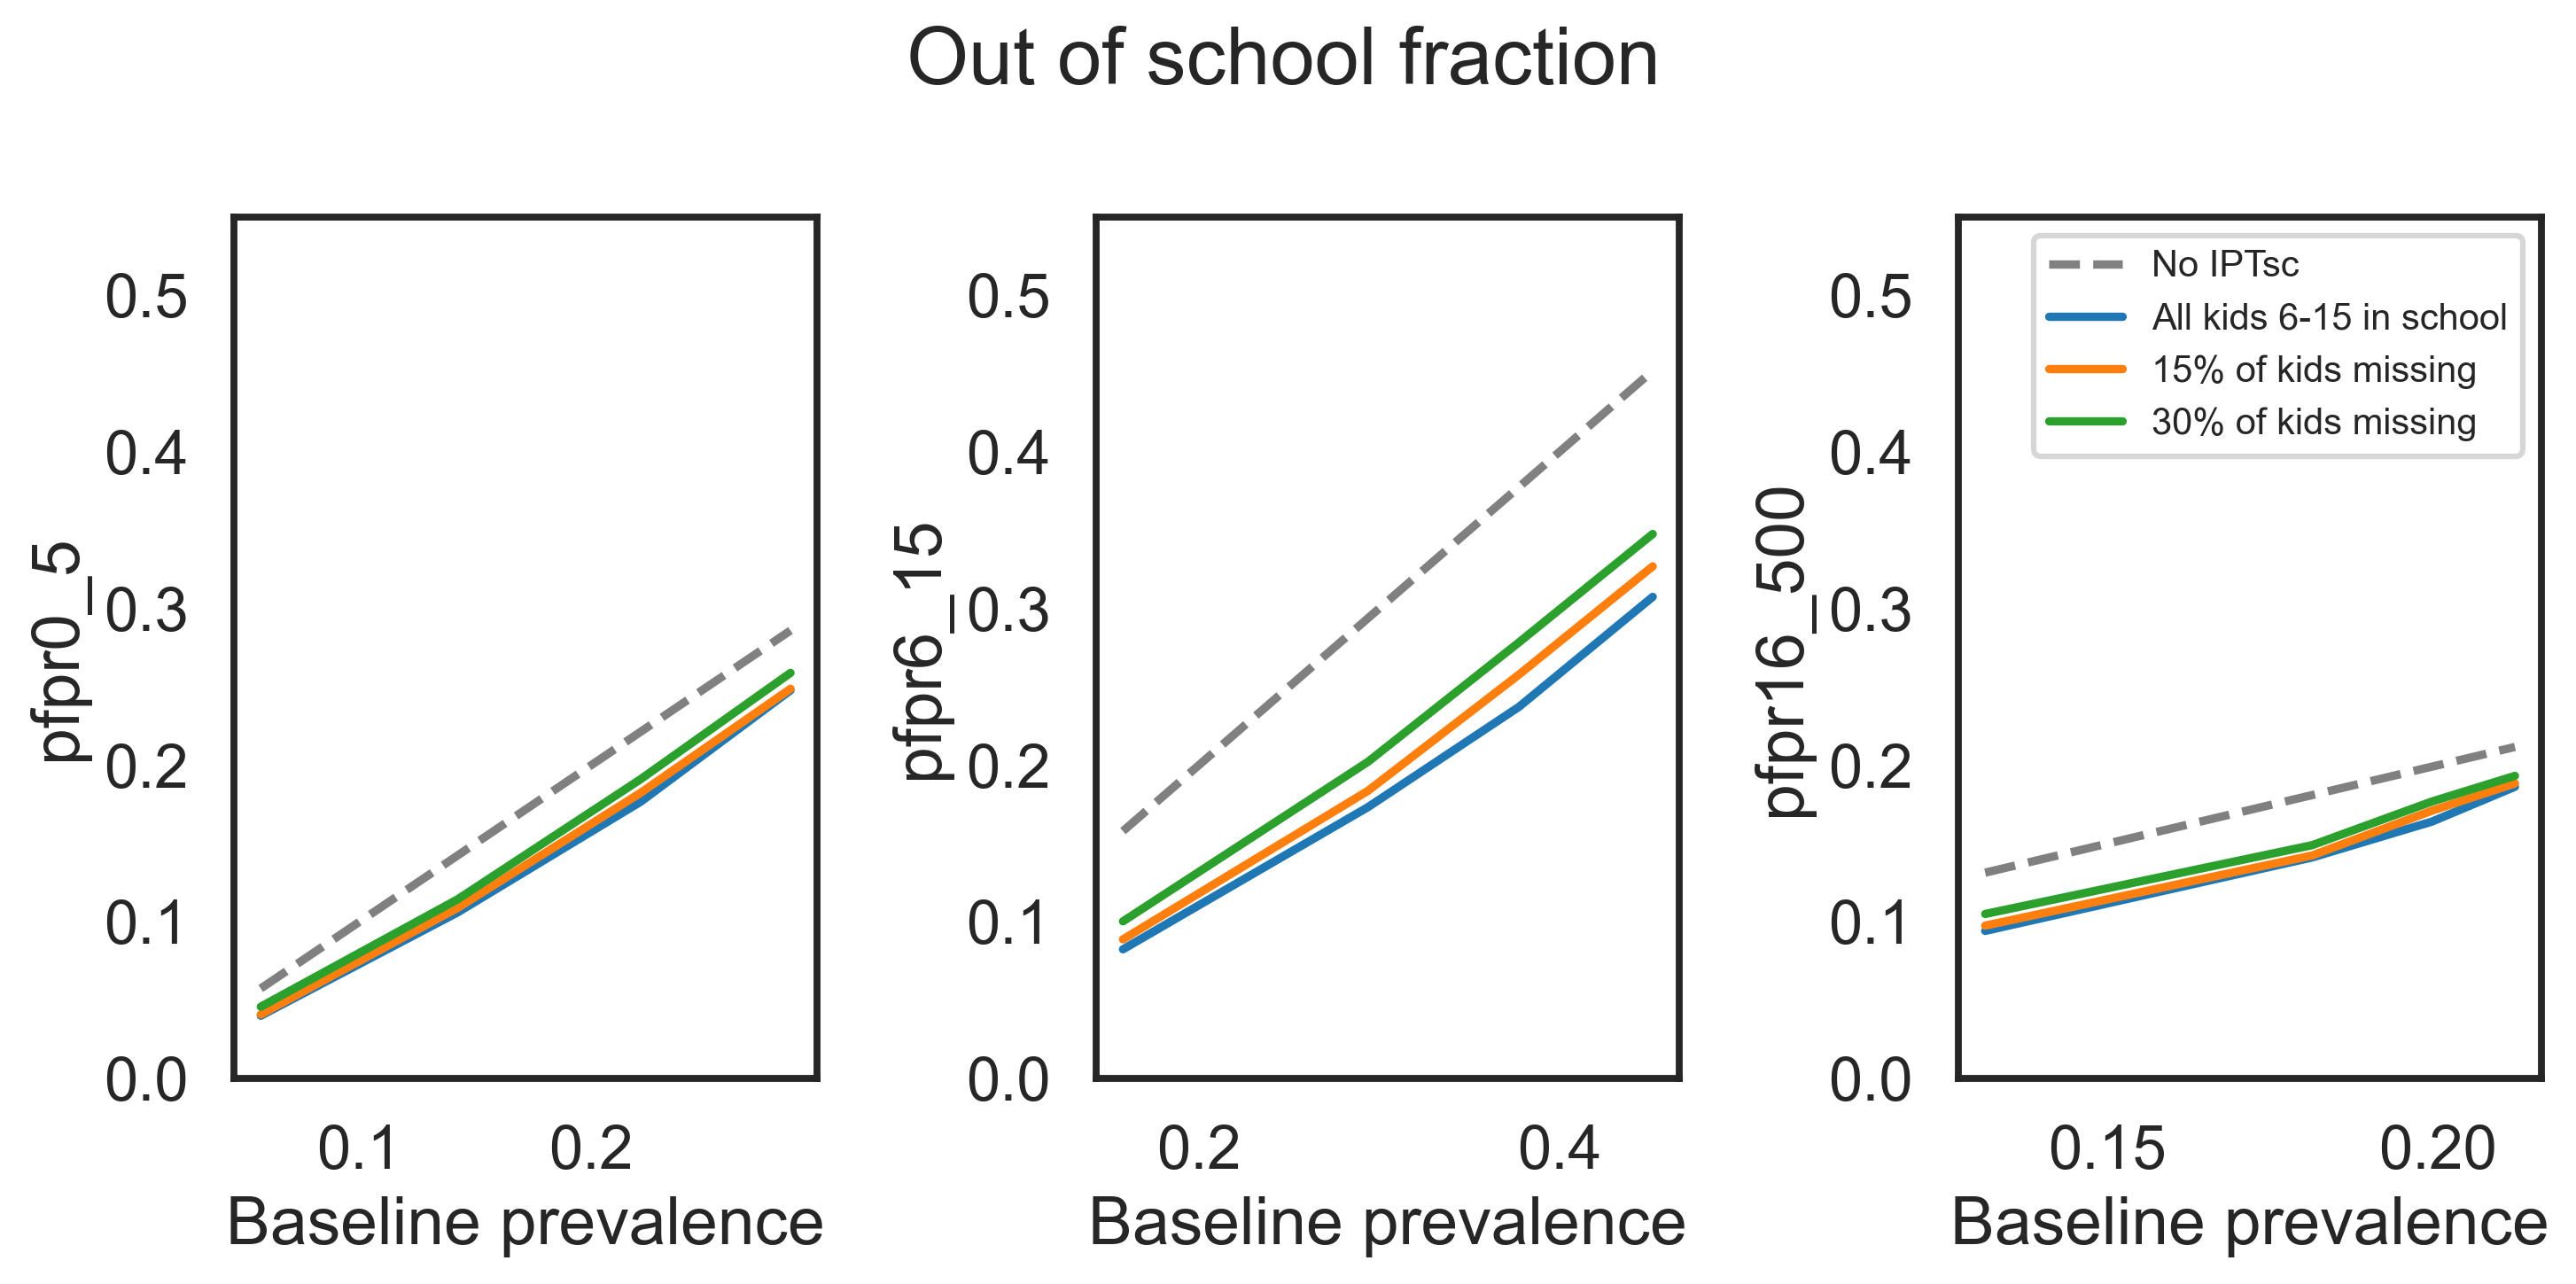

In [40]:
scenario_dict = {
    30: "No IPTsc",
    12: "All kids 6-15 in school",
    13: "15% of kids missing",
    14: "30% of kids missing"
}

modality_plot_by_group(list(scenario_dict.keys()), scenario_dict, suptitle="Out of school fraction")

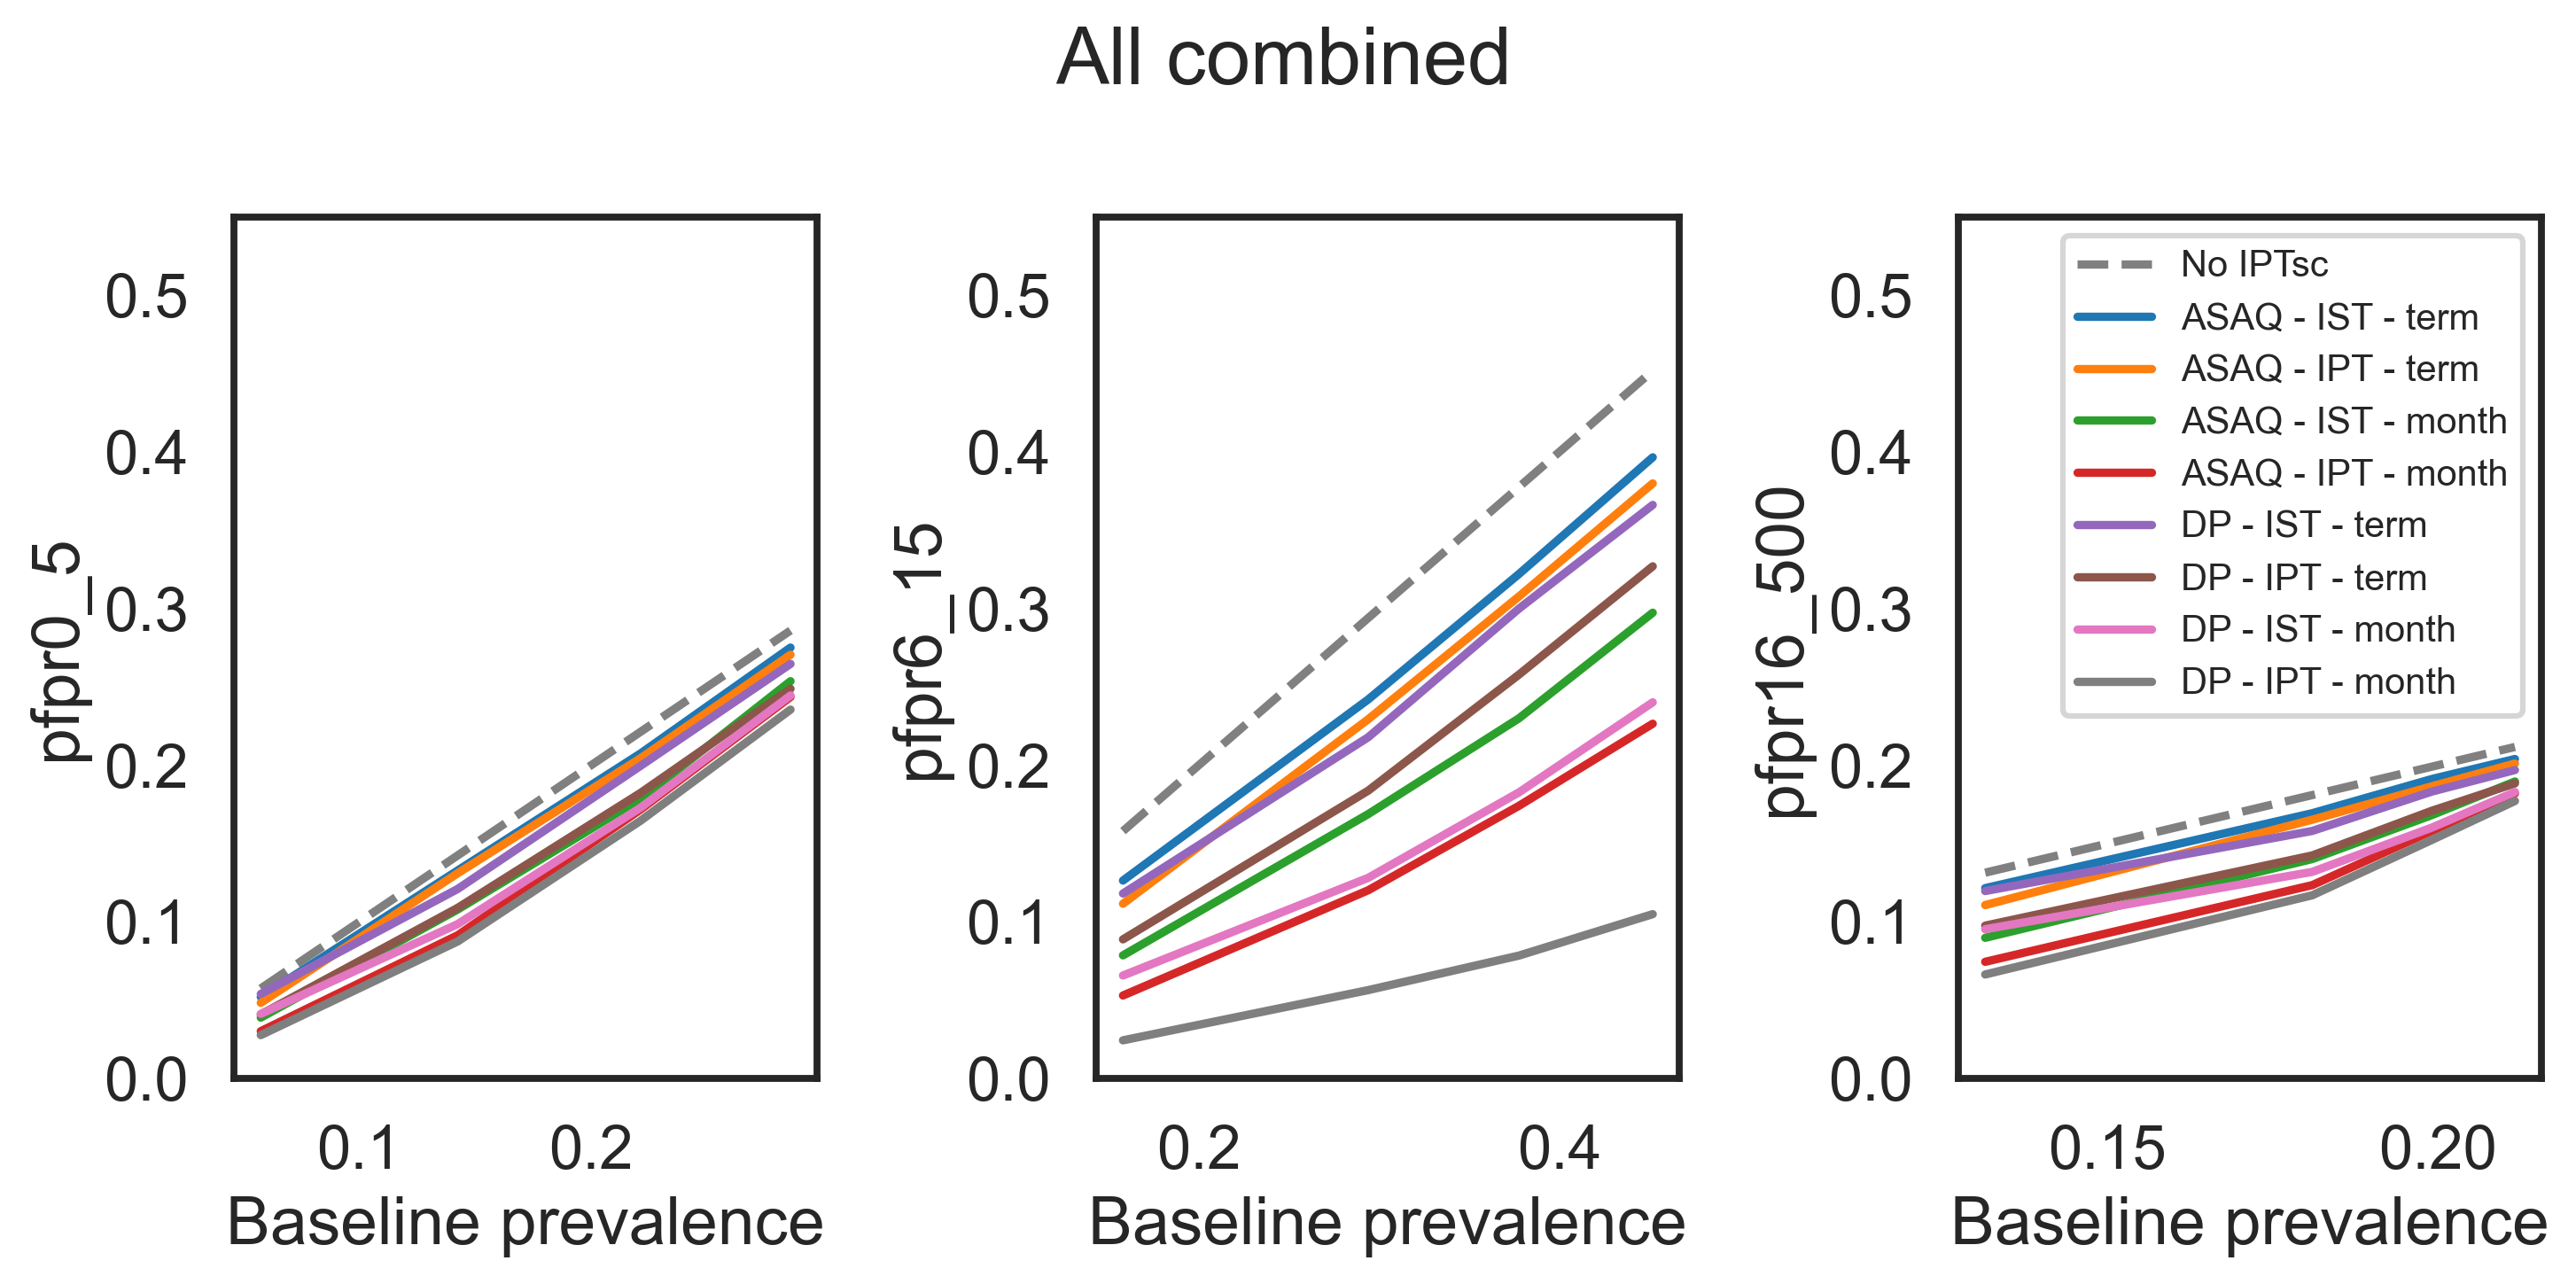

In [41]:
scenario_dict = {
    30: "No IPTsc",
    7: "ASAQ - IST - term",
    1: "ASAQ - IPT - term",
    10: "ASAQ - IST - month",
    4: "ASAQ - IPT - month",
    19: "DP - IST - term",
    13: "DP - IPT - term",
    22: "DP - IST - month",
    16: "DP - IPT - month",
}

modality_plot_by_group(list(scenario_dict.keys()), scenario_dict, suptitle="All combined")

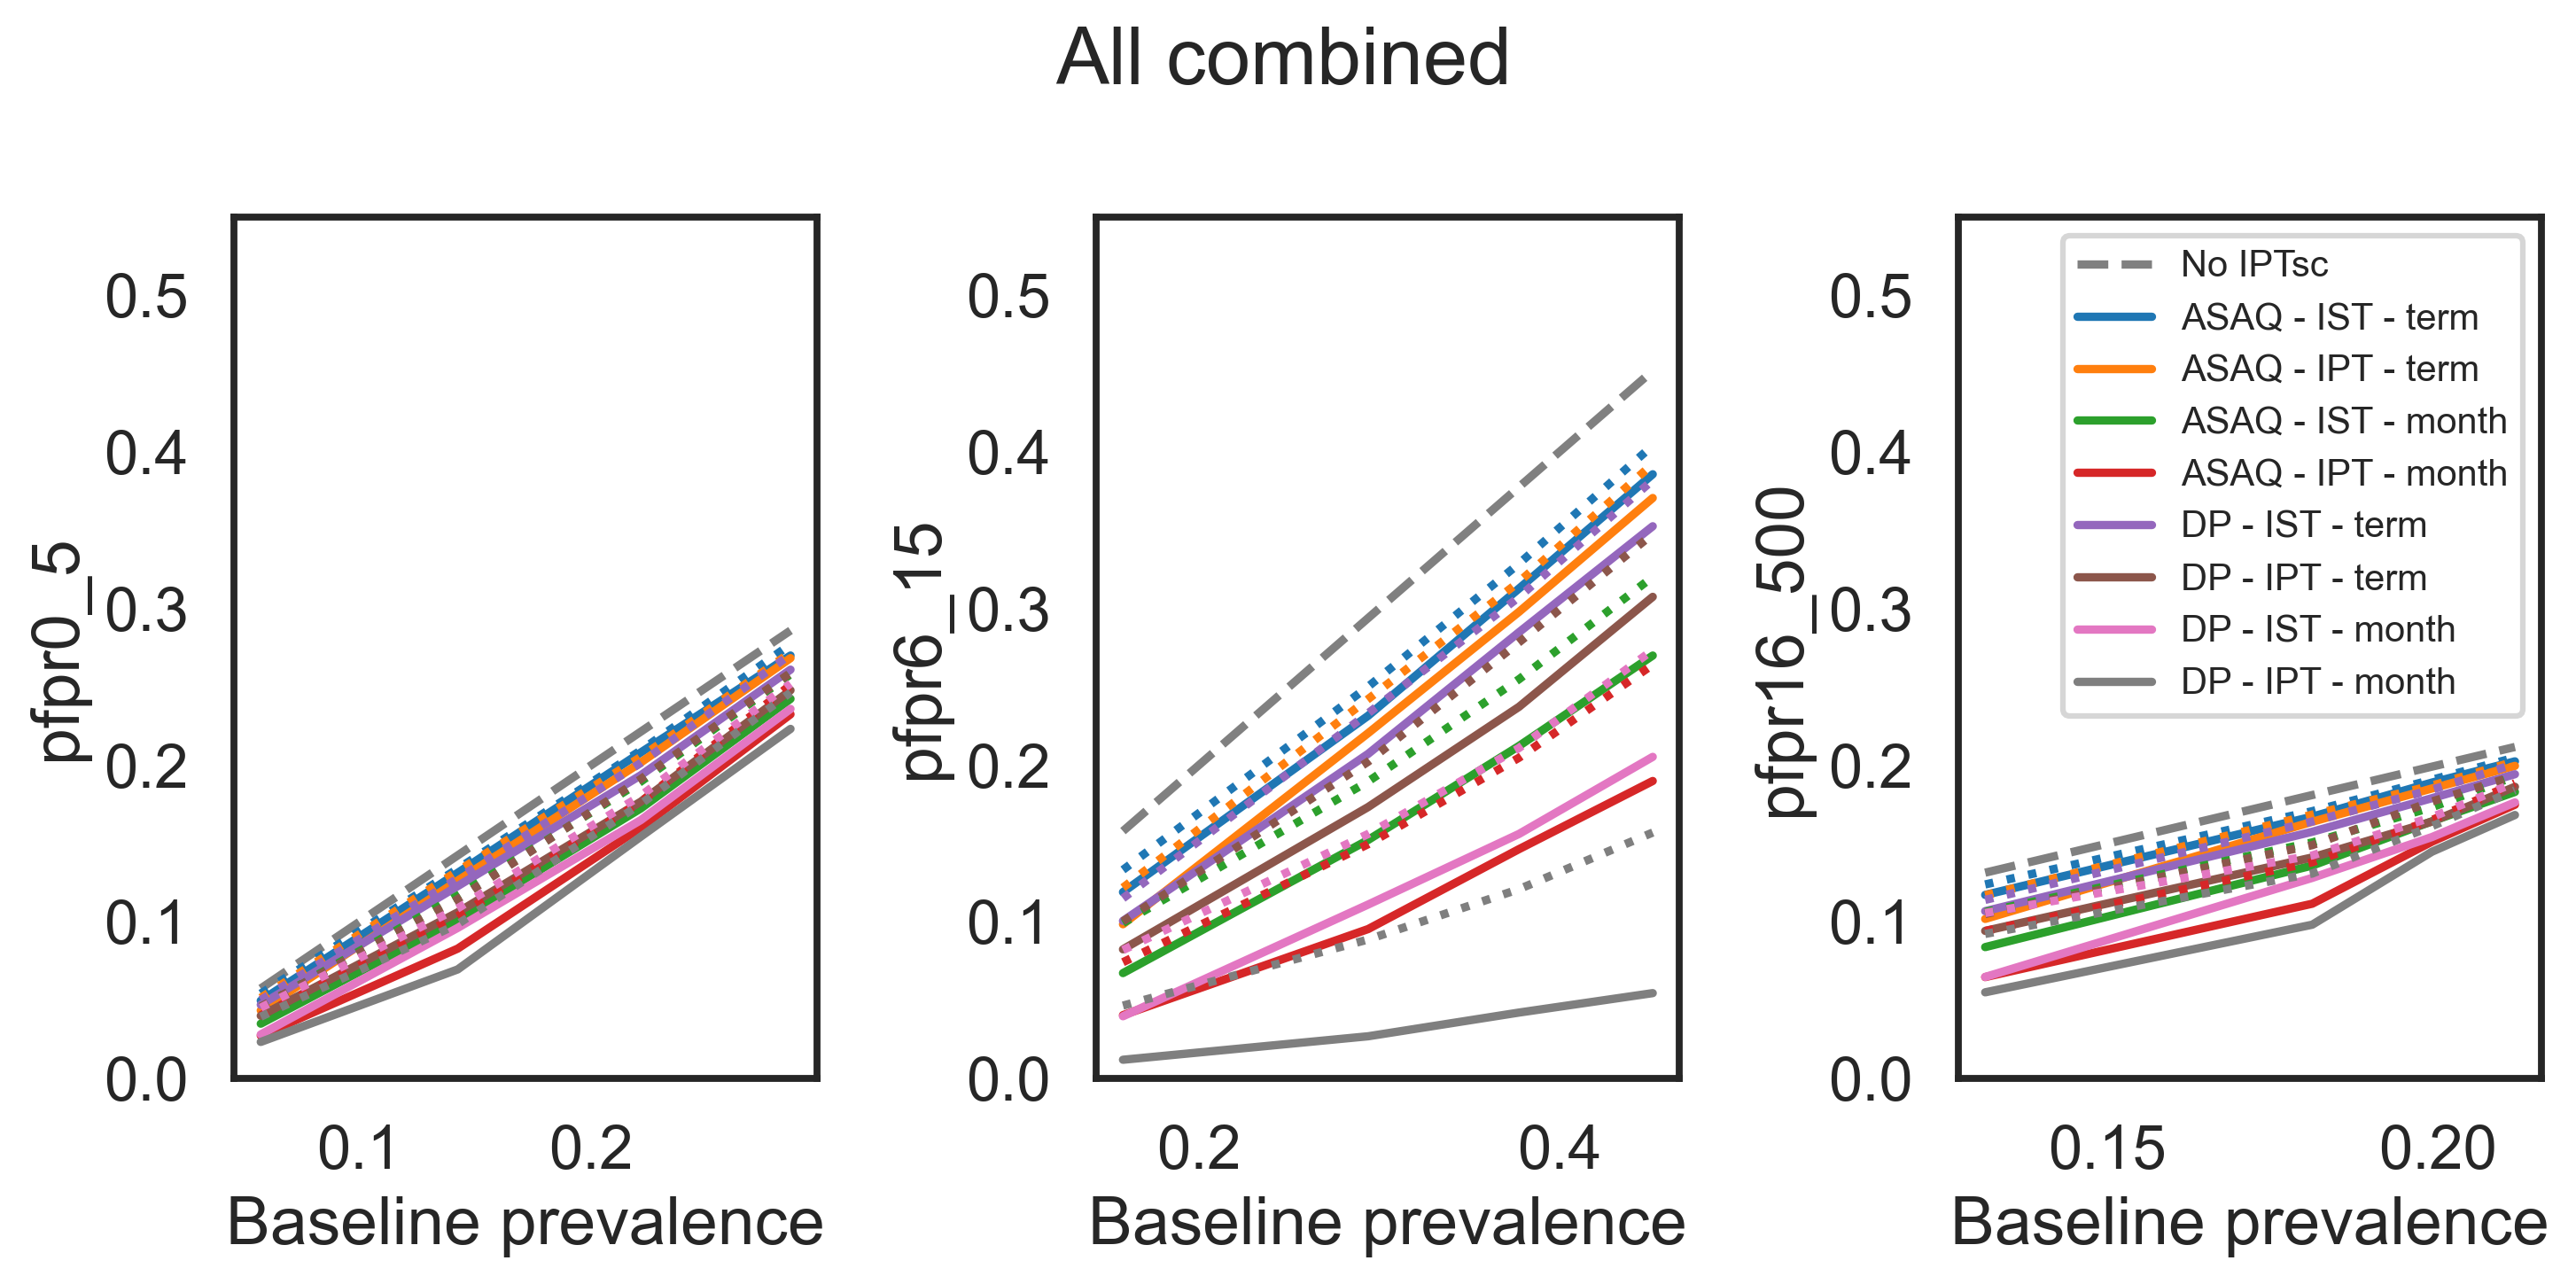

In [42]:
scenario_dict = {
    30: "No IPTsc",
    6: "ASAQ - IST - term",
    0: "ASAQ - IPT - term",
    9: "ASAQ - IST - month",
    3: "ASAQ - IPT - month",
    18: "DP - IST - term",
    12: "DP - IPT - term",
    21: "DP - IST - month",
    15: "DP - IPT - month",
    
    8: None,
    2: None,
    11: None,
    5: None,
    20: None,
    14: None,
    23: None,
    17: None,
}

s = [6,0,9,3,18,12,21,15]

color_dict = {}
linestyle_dict = {}
for i in range(len(s)):
    color_dict[s[i]] = "C{}".format(i)
    color_dict[s[i]+2] = "C{}".format(i)
    linestyle_dict[s[i]] = "solid"
    linestyle_dict[s[i]+2] = "dotted"
    
modality_plot_by_group(list(scenario_dict.keys()), 
                       scenario_dict, 
                       suptitle="All combined", 
                       color_dict=color_dict, 
                       linestyle_dict=linestyle_dict)

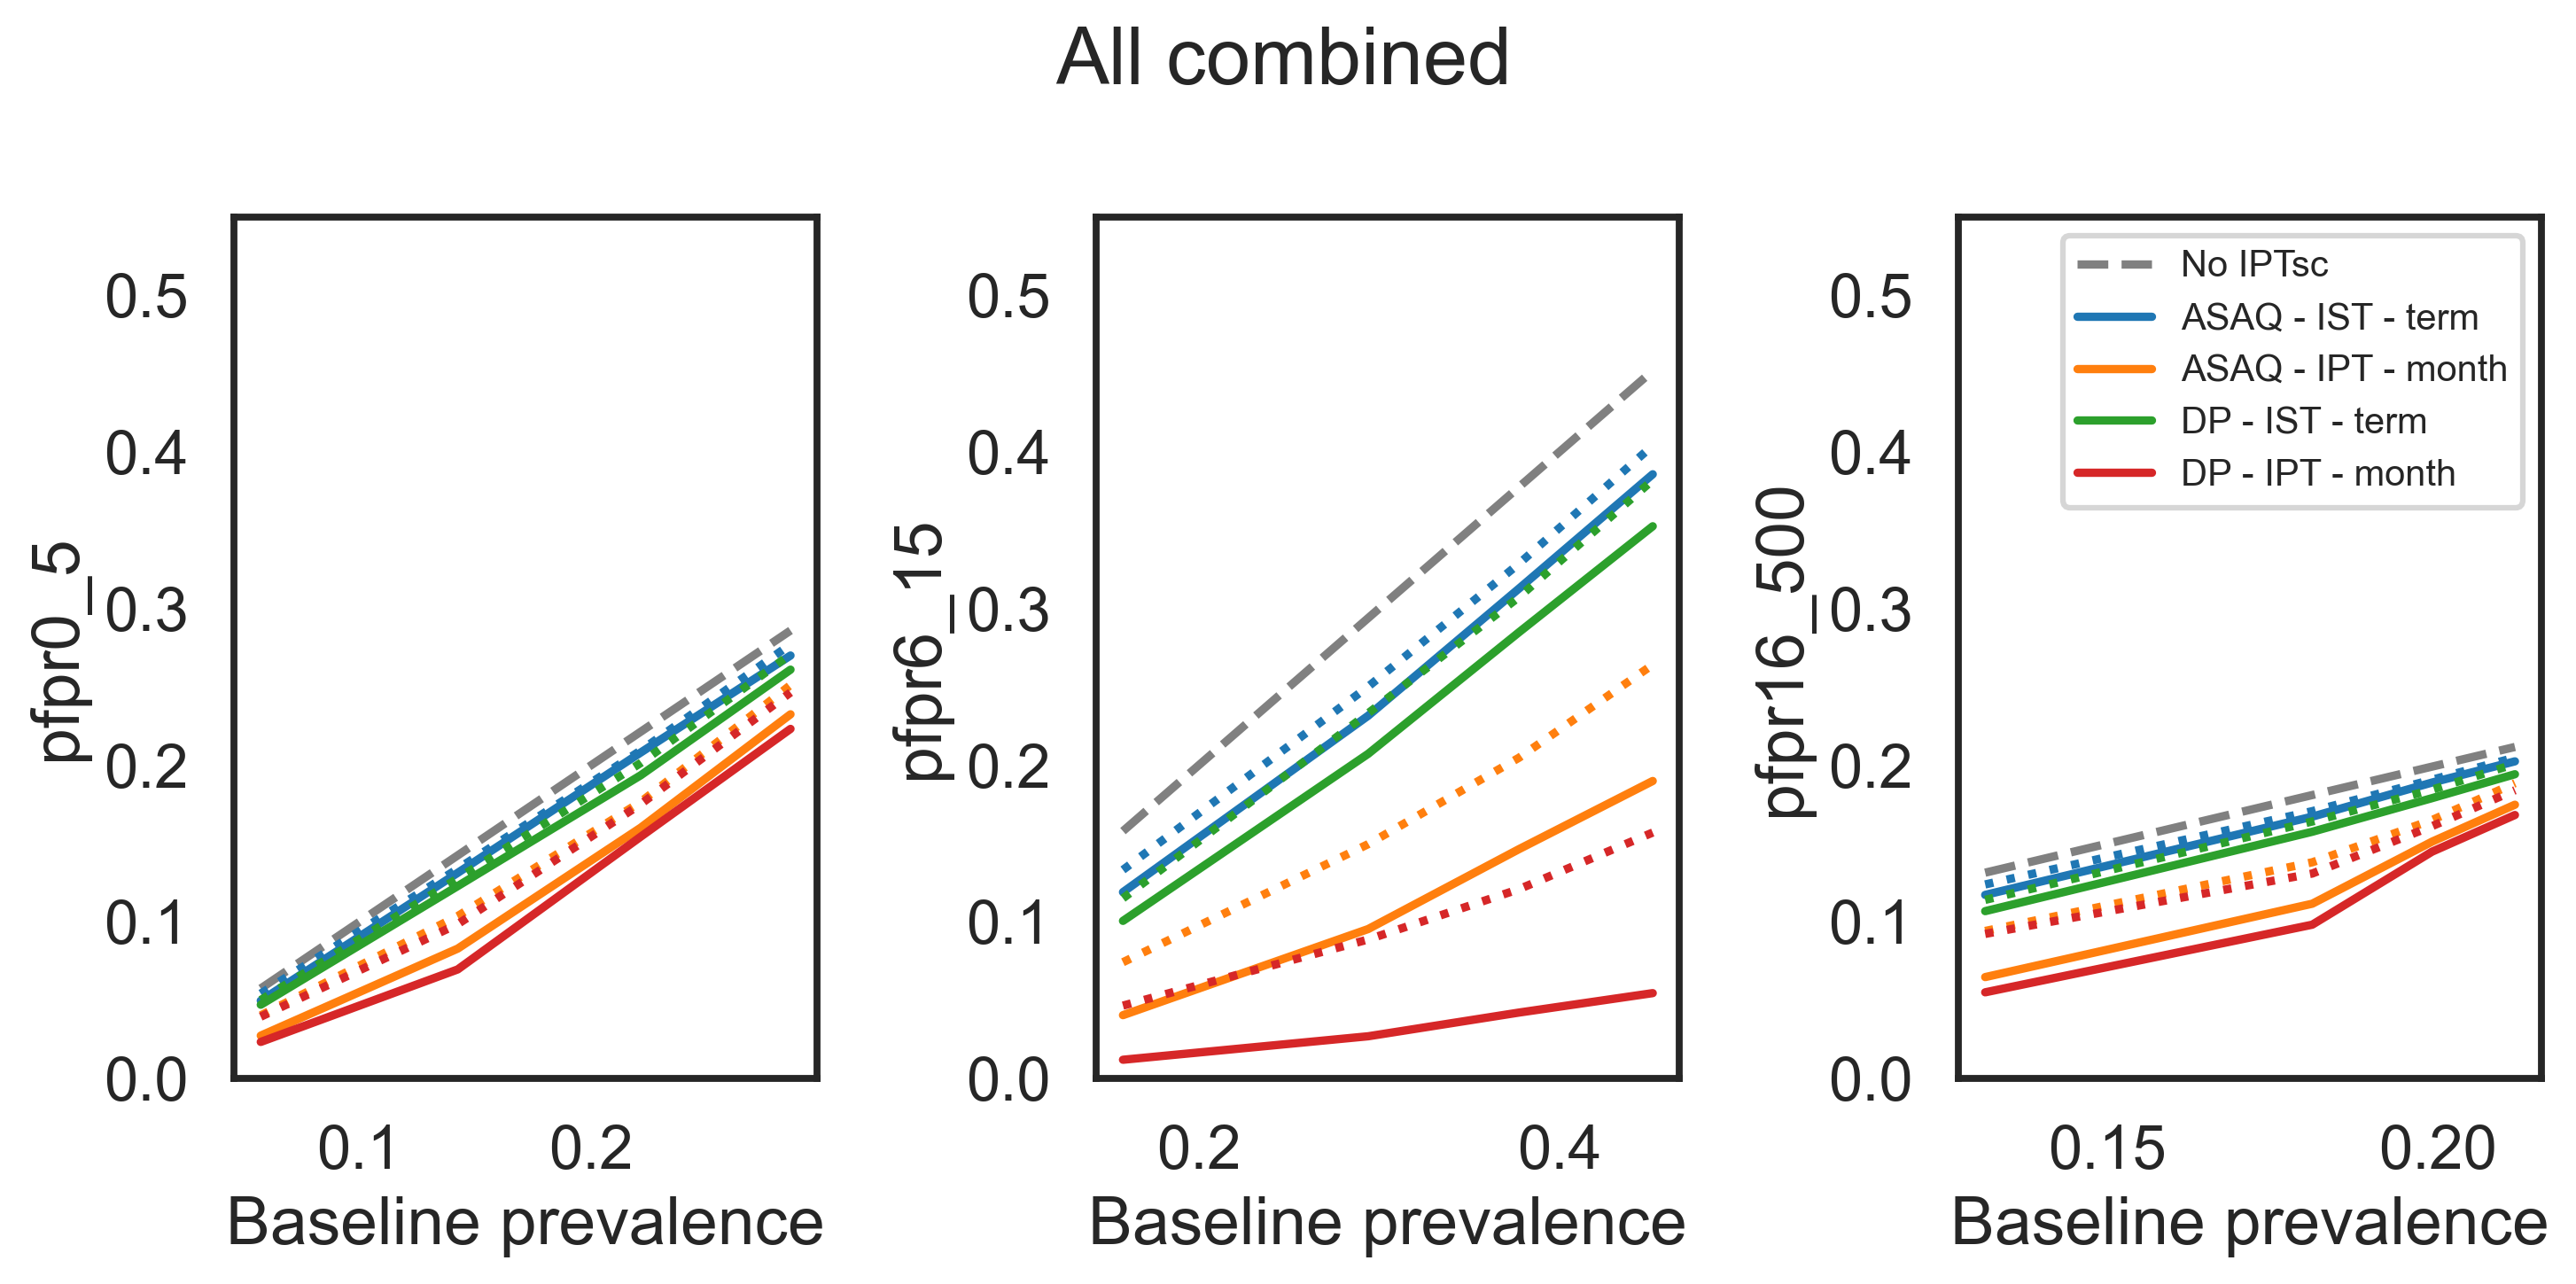

In [43]:
scenario_dict = {
    30: "No IPTsc",
    6: "ASAQ - IST - term",
    3: "ASAQ - IPT - month",
    18: "DP - IST - term",
    15: "DP - IPT - month",
    
    8: None,
    5: None,
    20: None,
    17: None,
}

s = [6,3,18,15]

color_dict = {}
linestyle_dict = {}
for i in range(len(s)):
    color_dict[s[i]] = "C{}".format(i)
    color_dict[s[i]+2] = "C{}".format(i)
    linestyle_dict[s[i]] = "solid"
    linestyle_dict[s[i]+2] = "dotted"
    
modality_plot_by_group(list(scenario_dict.keys()), 
                       scenario_dict, 
                       suptitle="All combined", 
                       color_dict=color_dict, 
                       linestyle_dict=linestyle_dict)

# Targeting school age vs younger

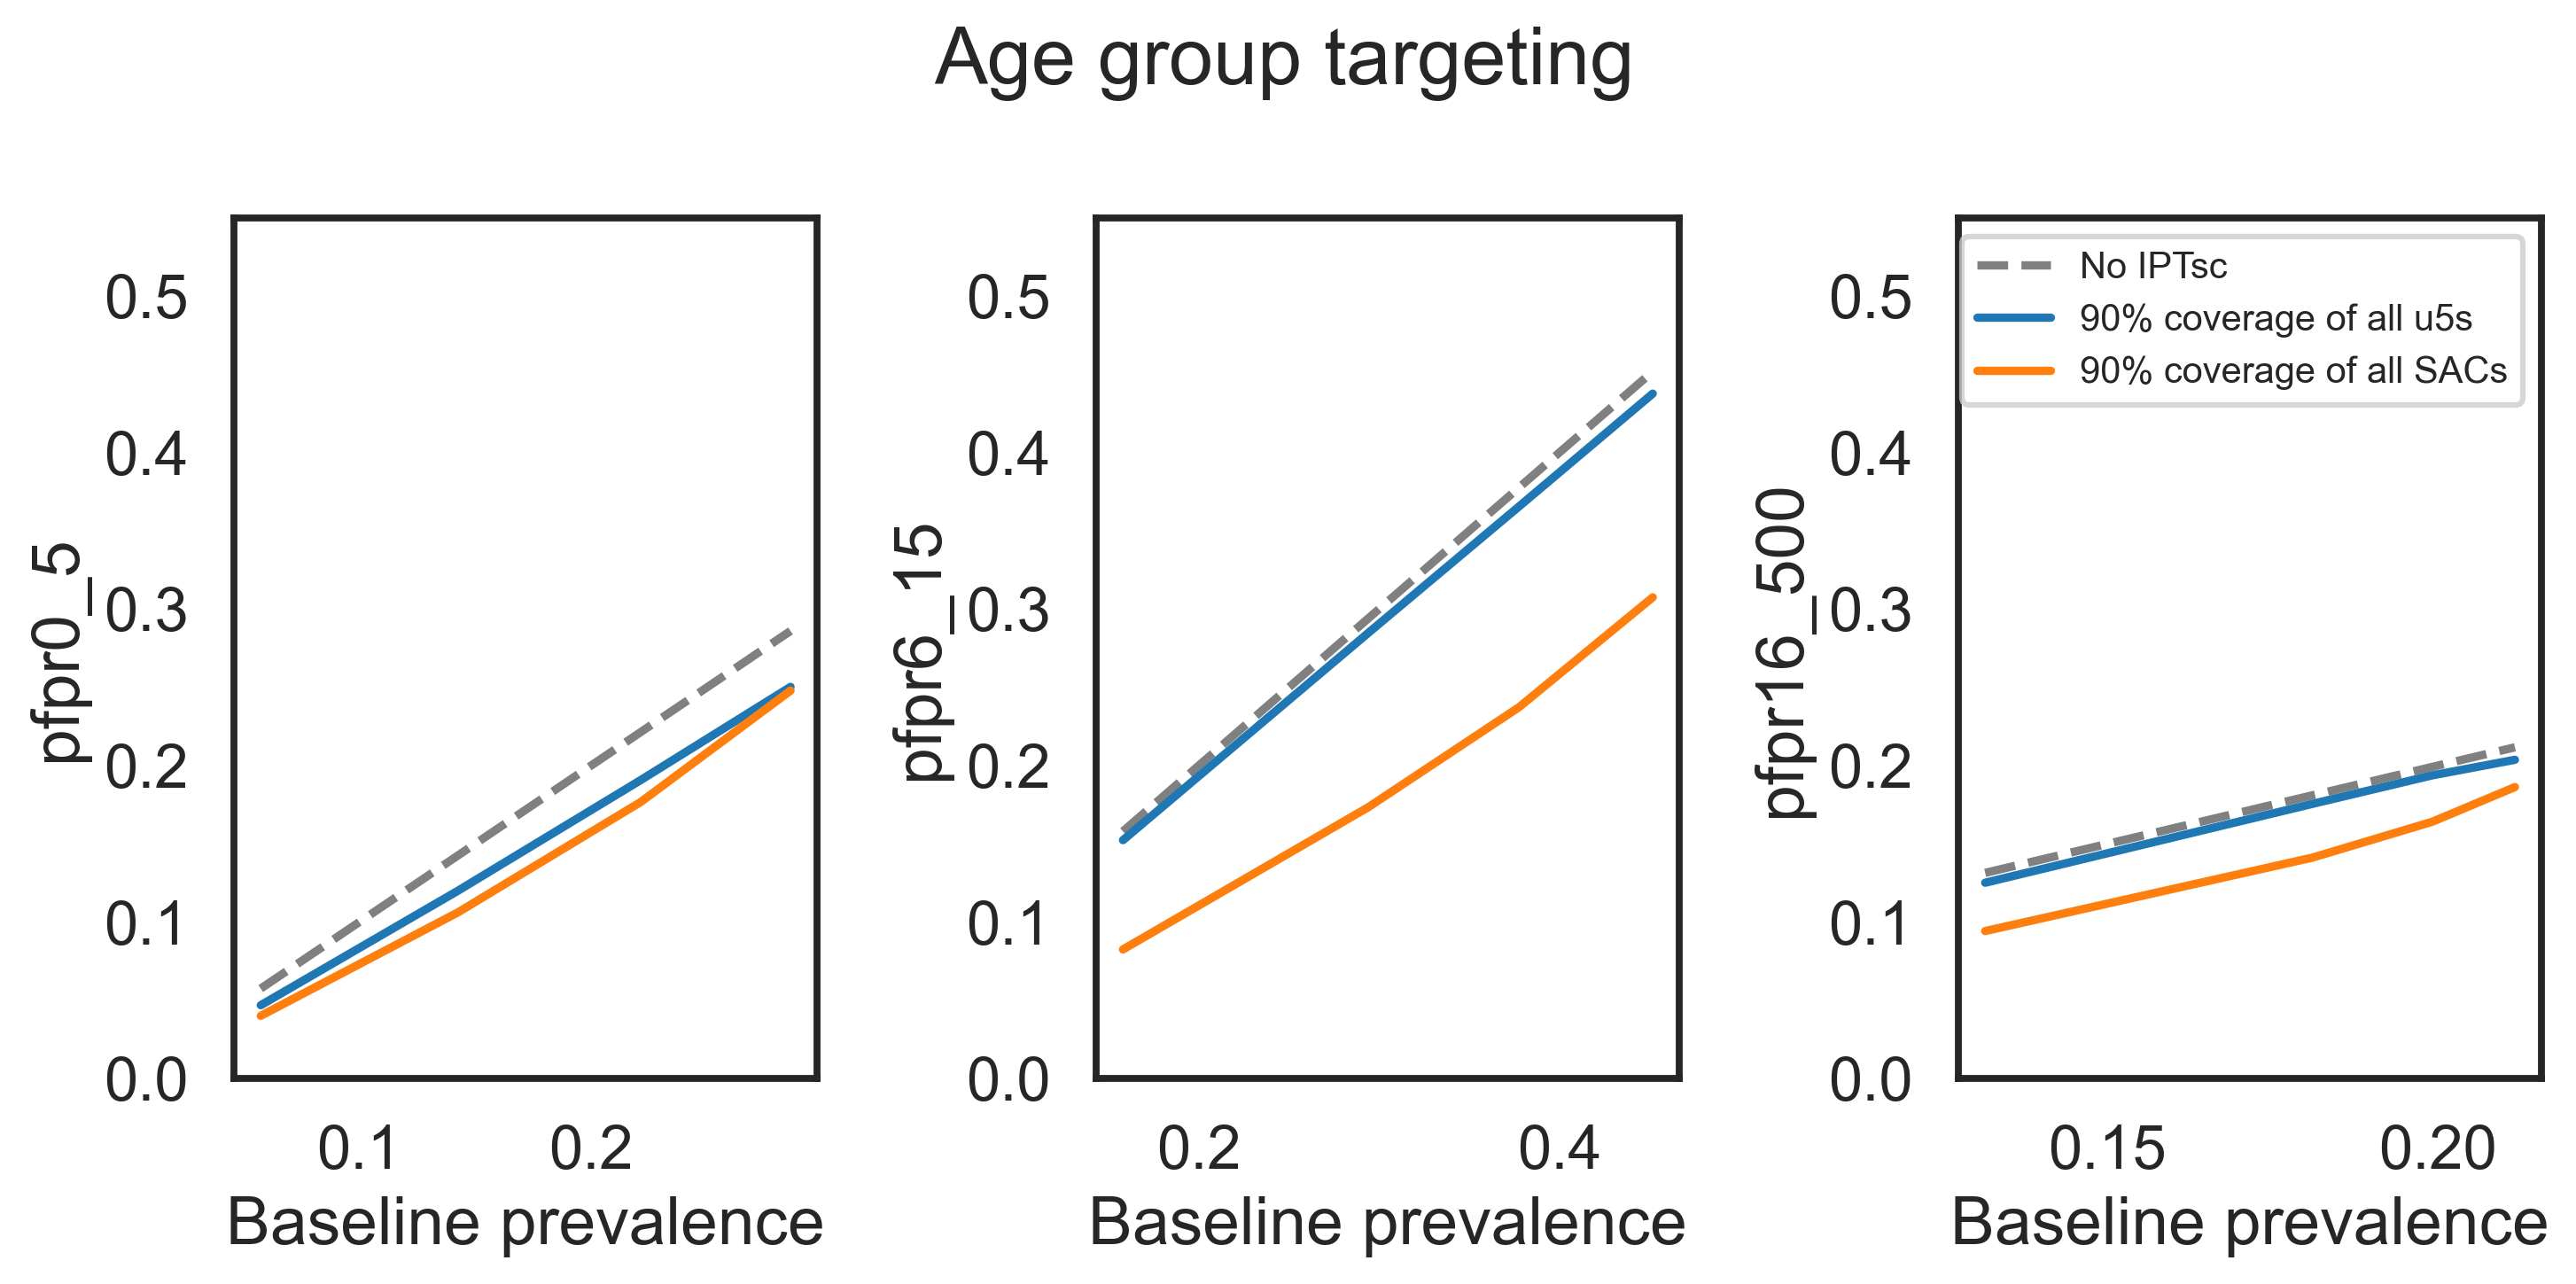

In [44]:
scenario_dict = {
    30: "No IPTsc",
    32: "90% coverage of all u5s",
    12: "90% coverage of all SACs",
}

modality_plot_by_group(list(scenario_dict.keys()), scenario_dict, suptitle="Age group targeting")

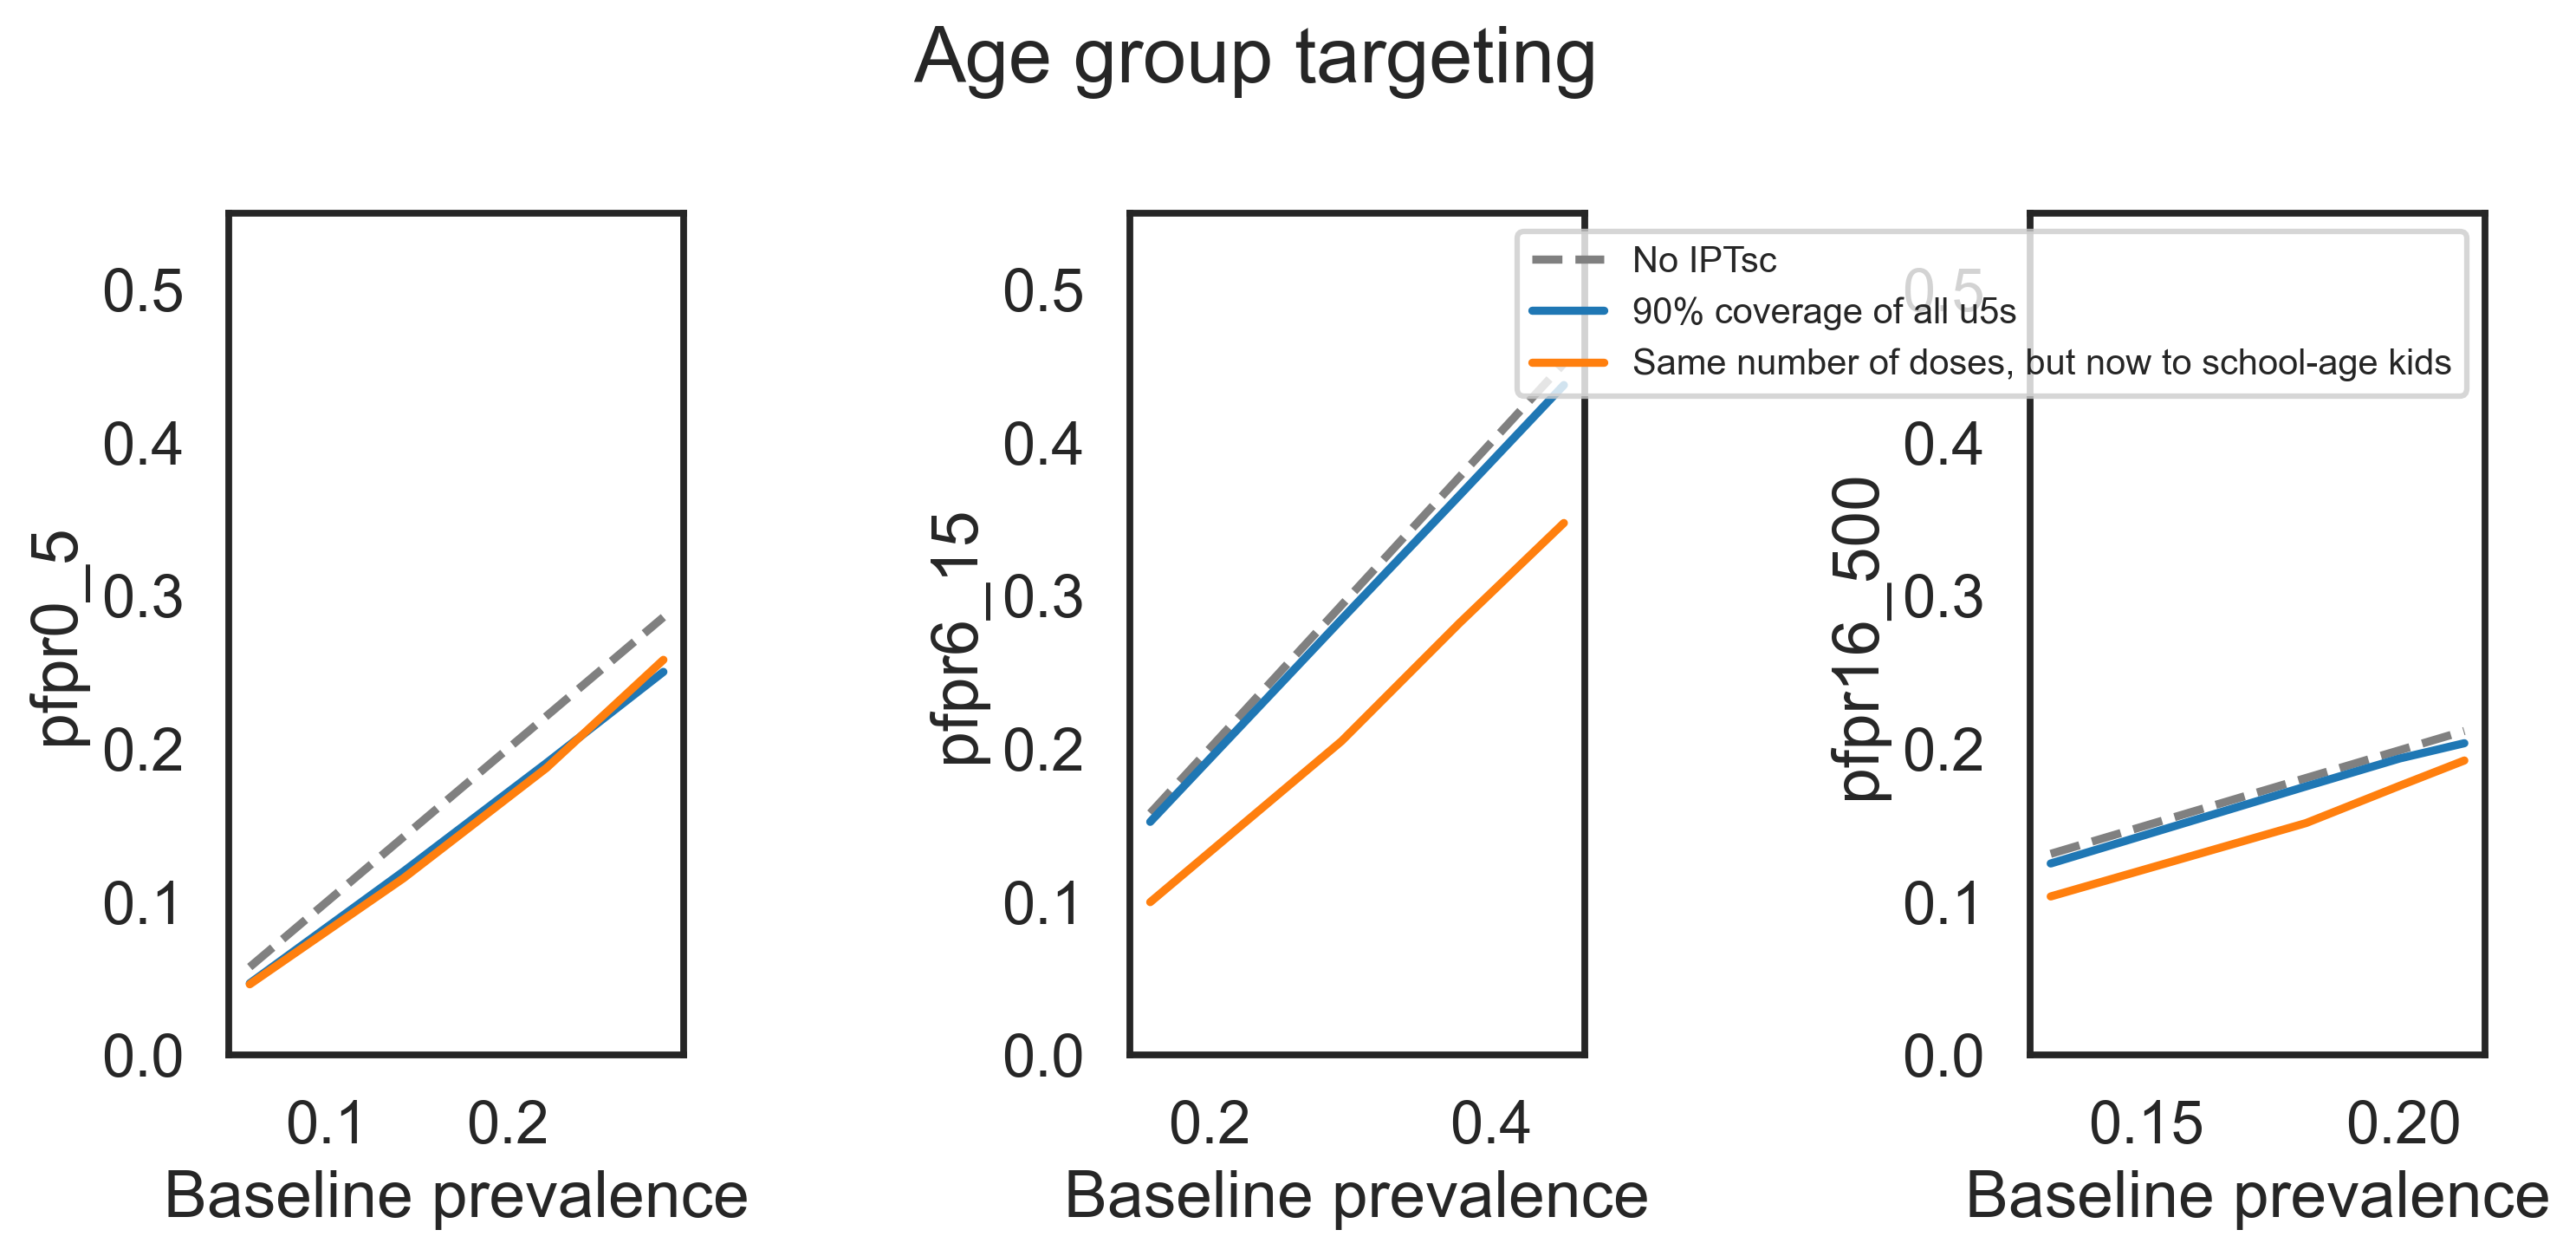

In [45]:
scenario_dict = {
    30: "No IPTsc",
    32: "90% coverage of all u5s",
    33: "Same number of doses, but now to school-age kids"
}

modality_plot_by_group(list(scenario_dict.keys()), scenario_dict, suptitle="Age group targeting")

# Results in terms of burden reduction (clinical/severe cases)

In [66]:
df_agg_w_baseline_and_burden = df_agg_w_baseline.copy(deep=True)

In [67]:
# Add total clinical burden fields:

for agebin in ["0_5", "2_10","6_15","16_500","_all"]:
    for case_type in ["clinical", "severe"]:
        old = df_agg_w_baseline_and_burden["{}_incidence{}_BASELINE".format(case_type, agebin)]
        new = df_agg_w_baseline_and_burden["{}_incidence{}".format(case_type, agebin)]
        frac_averted = (old-new)/old
        
        df_agg_w_baseline_and_burden["frac_averted_{}_{}".format(case_type, agebin)] = frac_averted
    

Text(0, 0.5, 'Percent reduction')

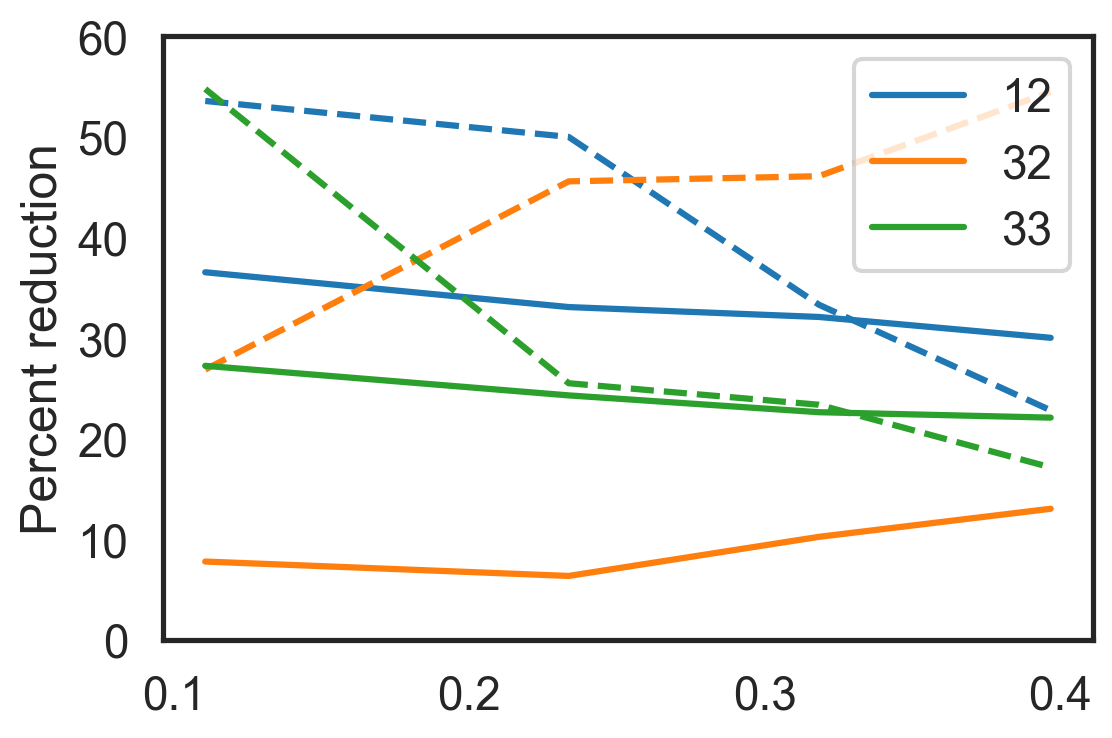

In [68]:
scenario_numbers = [12,32,33]

plt.figure(dpi=200)

i = 0
for s in scenario_numbers:
    sdf = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]
    
    c = "C{}".format(i)
    plt.plot(sdf["pfpr2_10_BASELINE"], 100*sdf["frac_averted_clinical__all"], label=s, c=c)
    plt.plot(sdf["pfpr2_10_BASELINE"], 100*sdf["frac_averted_severe__all"], c=c,linestyle='dashed')
    
    i = i+1
plt.legend()
plt.ylim([0,60])
plt.ylabel("PfPR2_10")
plt.ylabel("Percent reduction")

KeyError: 'severe_incidence15_500'

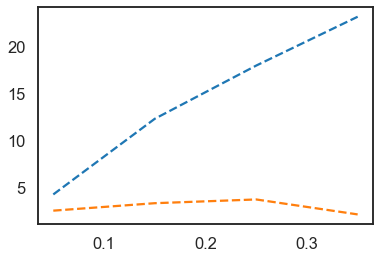

In [49]:
# plt.plot(df_baseline["burnin_approx_pfpr2_10"], df_baseline["clinical_incidence0_5"], c="C0")
plt.plot(df_baseline["burnin_approx_pfpr2_10"], df_baseline["severe_incidence0_5"]*df_baseline["pop0_5"], c="C0", linestyle='dashed', label="0-5")
plt.plot(df_baseline["burnin_approx_pfpr2_10"], df_baseline["severe_incidence6_15"]*df_baseline["pop6_15"], c="C1", linestyle='dashed', label="6-15")
plt.plot(df_baseline["burnin_approx_pfpr2_10"], df_baseline["severe_incidence16_500"]*df_baseline["pop16_500"], c="C2", linestyle='dashed', label="15+")
plt.plot(df_baseline["burnin_approx_pfpr2_10"], df_baseline["severe_incidence_all"]*df_baseline["pop_all"], c="black", linestyle='solid', label="All")

plt.xlabel("Baseline PfPR2-10")
plt.ylabel("Number of severe cases")
plt.legend()

In [ ]:
scenario_dict = {
    30: "No IPTsc",
    12: "90% coverage of SAC",
    32: "90% coverage of u5s"
}

case_type = "severe"

scenarios = list(scenario_dict.keys())
s_dict = {}
for s in scenarios:
    s_dict[s] = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]
        
plt.figure(dpi=300, figsize=(10,4))
i = 0
for s in scenarios:
    plt.subplot(1,3,i+1)
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence0_5".format(case_type)]*s_dict[s]["pop0_5"], c="C0", linestyle='dashed', label="0-5")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence6_15".format(case_type)]*s_dict[s]["pop6_15"], c="C1", linestyle='dashed', label="6-15")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence16_500".format(case_type)]*s_dict[s]["pop16_500"], c="C2", linestyle='dashed', label="15+")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence_all".format(case_type)]*s_dict[s]["pop_all"], c="black", linestyle='solid', label="All")

    plt.ylim([0,26])
    plt.title(scenario_dict[s])
    plt.legend()
    plt.xlabel("Baseline PfPR2-10")
    if i == 0:
        plt.ylabel("Severe cases")
    
    i += 1


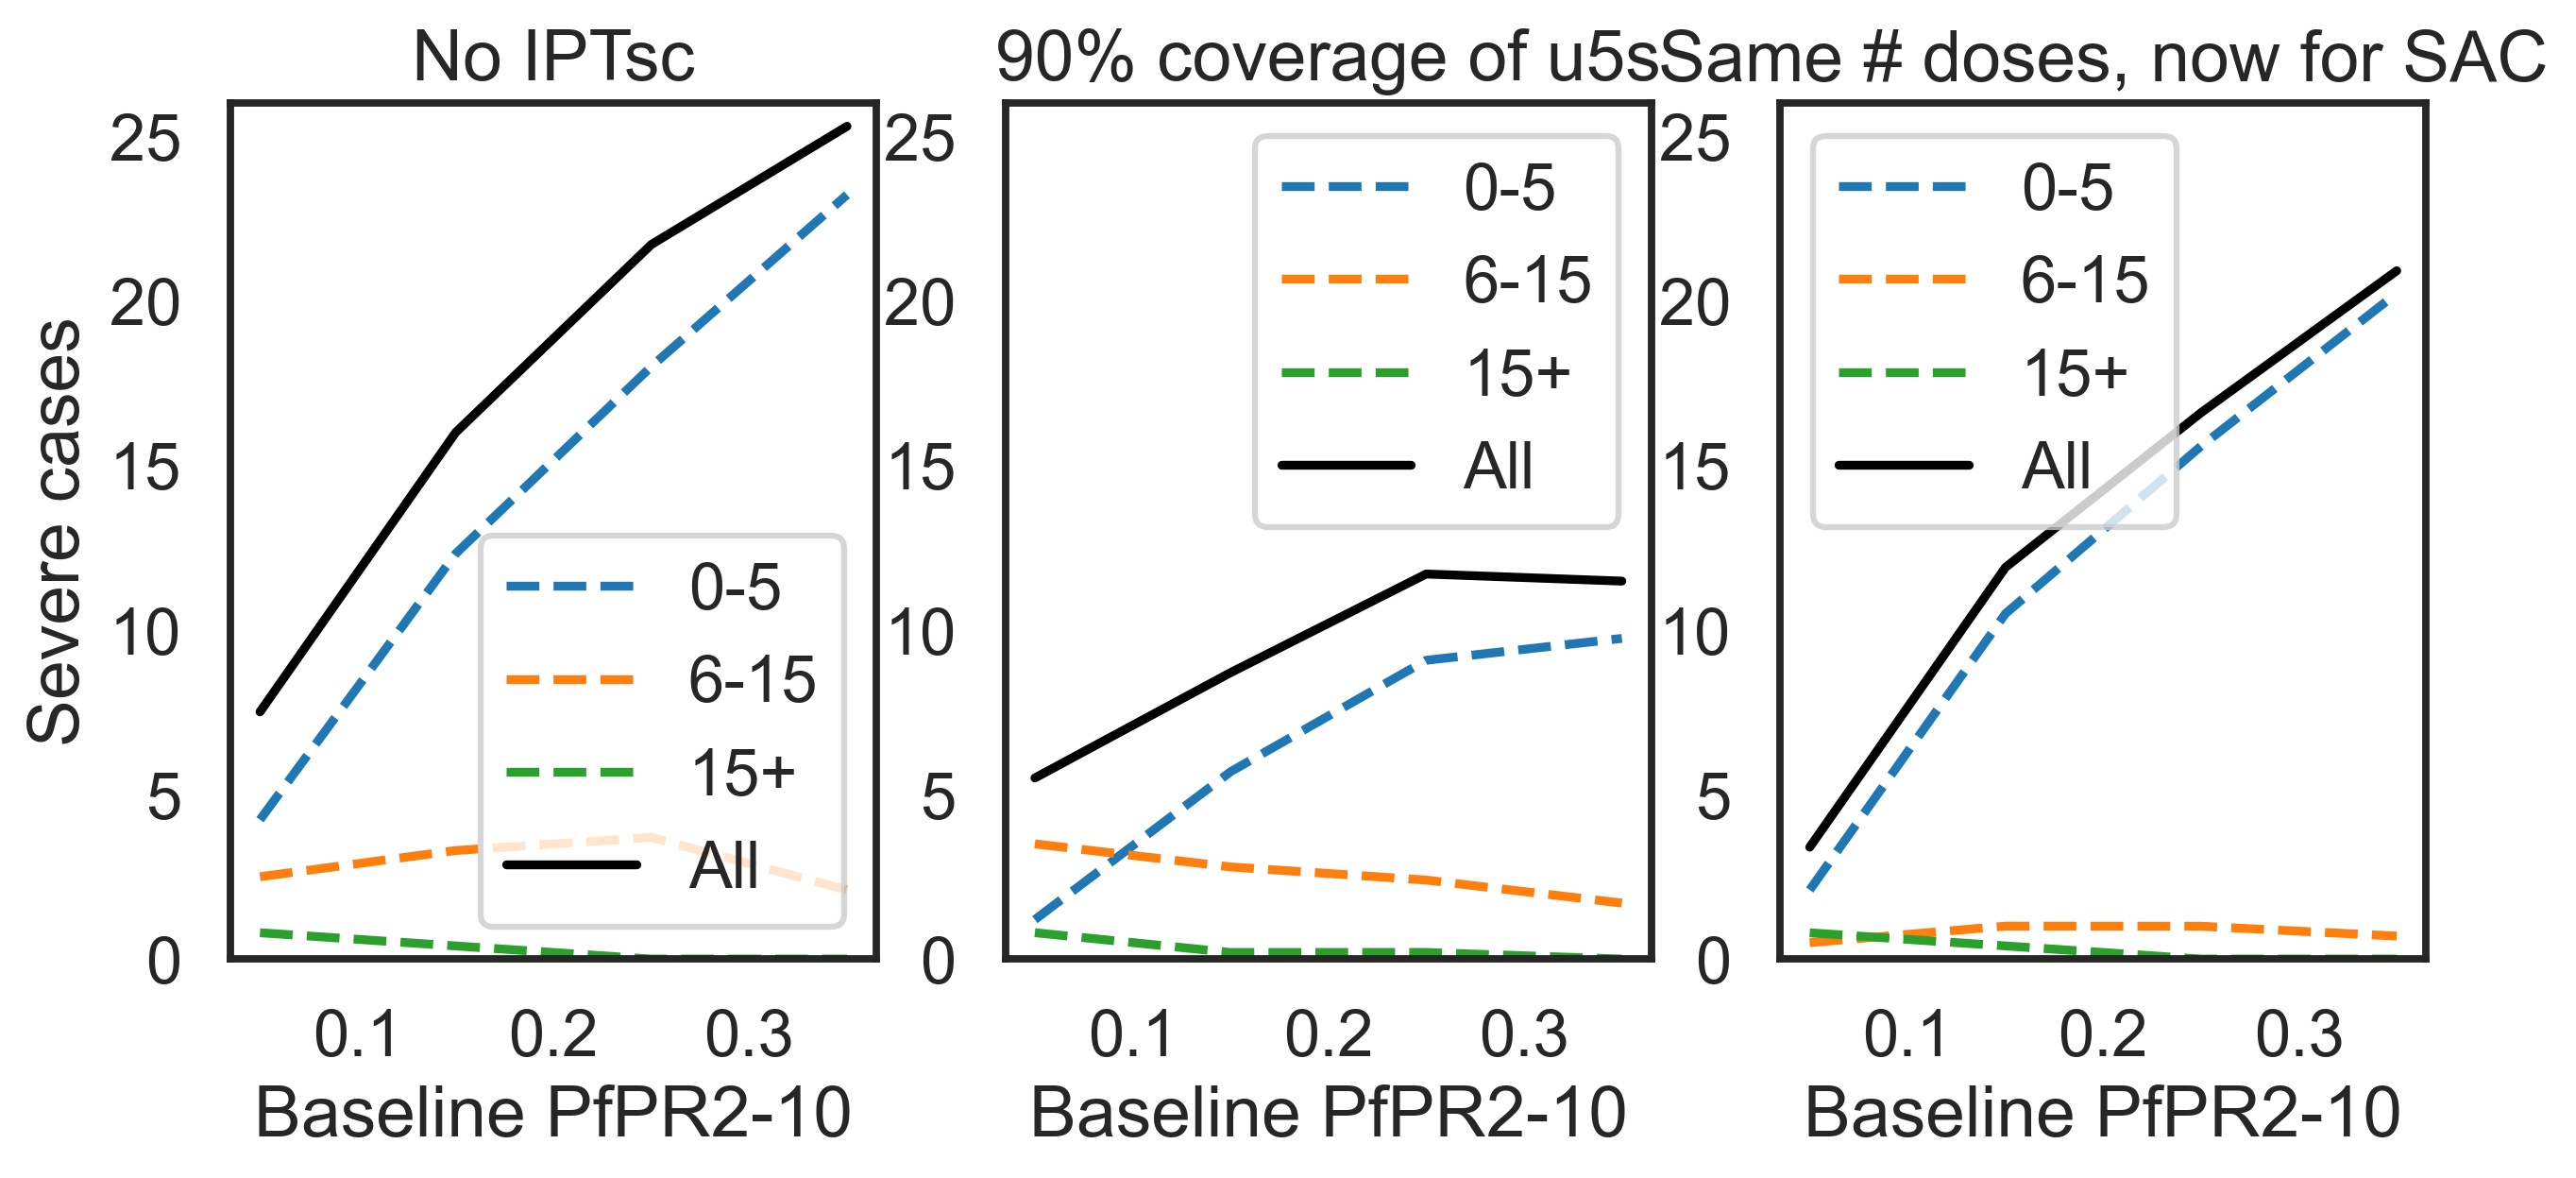

In [51]:
scenario_dict = {
    30: "No IPTsc",
    32: "90% coverage of u5s",
    33: "Same # doses, now for SAC"
}

case_type = "severe"

scenarios = list(scenario_dict.keys())
s_dict = {}
for s in scenarios:
    s_dict[s] = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]
        
plt.figure(dpi=300, figsize=(10,4))
i = 0
for s in scenarios:
    plt.subplot(1,3,i+1)
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence0_5".format(case_type)]*s_dict[s]["pop0_5"], c="C0", linestyle='dashed', label="0-5")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence6_15".format(case_type)]*s_dict[s]["pop6_15"], c="C1", linestyle='dashed', label="6-15")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence16_500".format(case_type)]*s_dict[s]["pop16_500"], c="C2", linestyle='dashed', label="15+")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence_all".format(case_type)]*s_dict[s]["pop_all"], c="black", linestyle='solid', label="All")

    plt.ylim([0,26])
    plt.title(scenario_dict[s])
    plt.legend()
    plt.xlabel("Baseline PfPR2-10")
    if i == 0:
        plt.ylabel("Severe cases")
    
    i += 1

plt.savefig("figures/2021-04-13_dryrun/severe_cases_by_age.pdf")

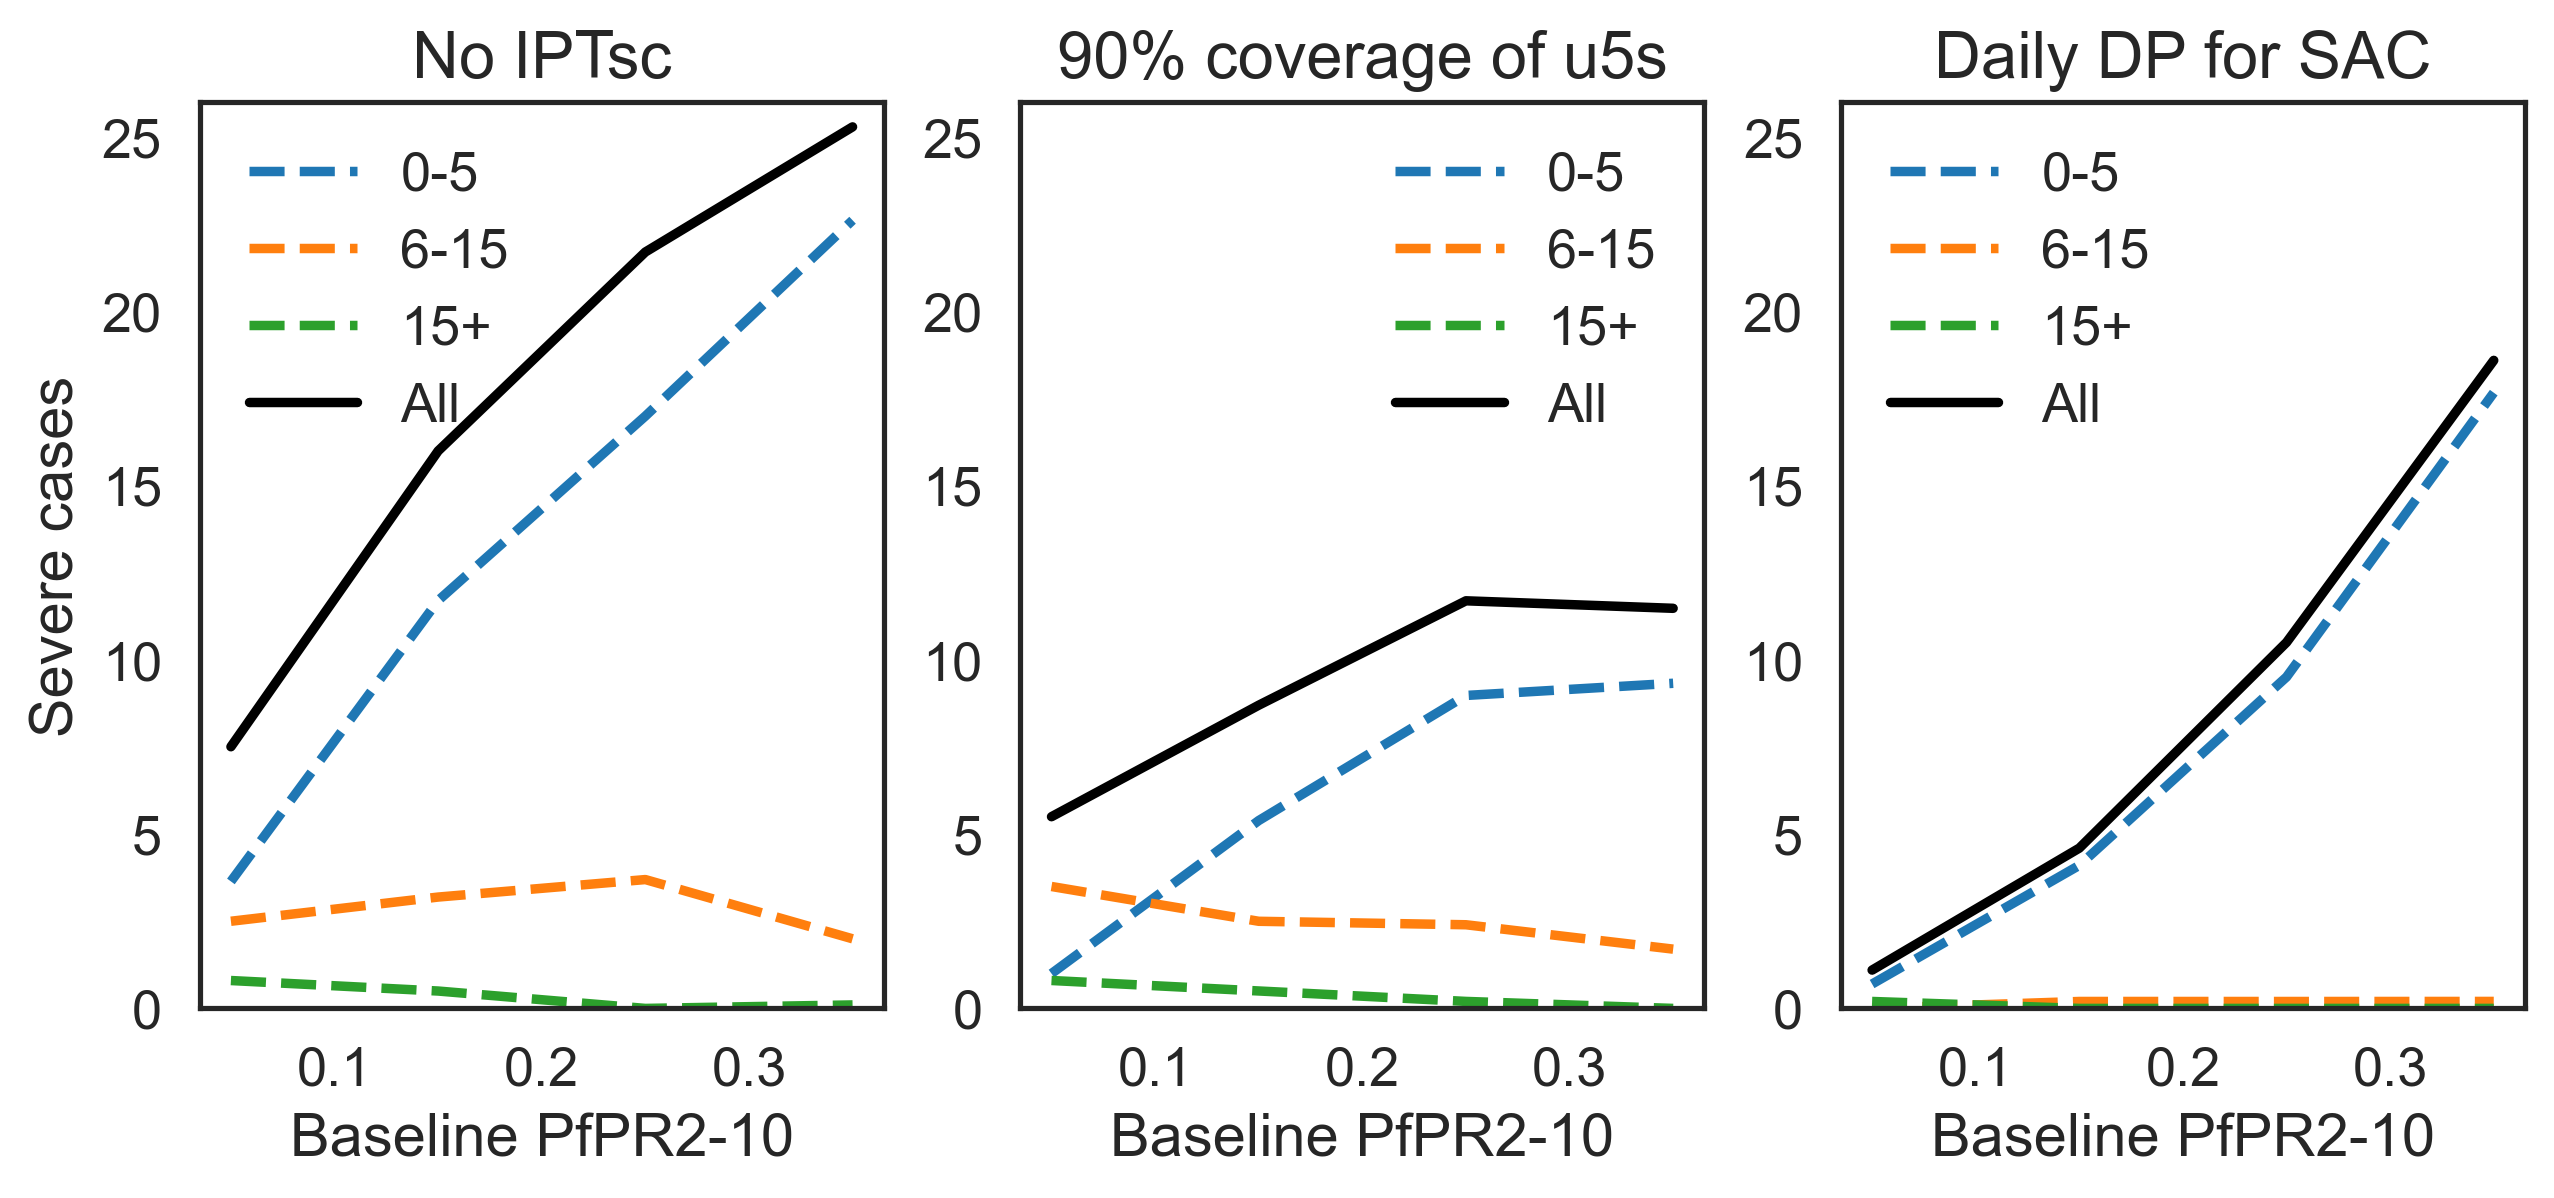

In [240]:
scenario_dict = {
    30: "No IPTsc",
    32: "90% coverage of u5s",
    27: "Daily DP for SAC"
}

case_type = "severe"

scenarios = list(scenario_dict.keys())
s_dict = {}
for s in scenarios:
    s_dict[s] = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]
        
plt.figure(dpi=300, figsize=(10,4))
i = 0
for s in scenarios:
    plt.subplot(1,3,i+1)
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence0_5".format(case_type)]*s_dict[s]["pop0_5"], c="C0", linestyle='dashed', label="0-5")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence6_15".format(case_type)]*s_dict[s]["pop6_15"], c="C1", linestyle='dashed', label="6-15")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence16_500".format(case_type)]*s_dict[s]["pop16_500"], c="C2", linestyle='dashed', label="15+")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence_all".format(case_type)]*s_dict[s]["pop_all"], c="black", linestyle='solid', label="All")

    plt.ylim([0,26])
    plt.title(scenario_dict[s])
    plt.legend()
    plt.xlabel("Baseline PfPR2-10")
    if i == 0:
        plt.ylabel("Severe cases")
    
    i += 1


In [13]:
# Fraction of burden in each age bin:
df_baseline["clinical_cases_all"] = df_baseline["clinical_incidence_all"]*df_baseline["pop_all"]
df_baseline["clinical_cases0_5"] = df_baseline["clinical_incidence0_5"]*df_baseline["pop0_5"]
df_baseline["clinical_cases6_15"] = df_baseline["clinical_incidence6_15"]*df_baseline["pop6_15"]
print(df_baseline["clinical_cases0_5"]/df_baseline["clinical_cases_all"])
print(df_baseline["clinical_cases6_15"]/df_baseline["clinical_cases_all"])

df_baseline["severe_cases_all"] = df_baseline["severe_incidence_all"]*df_baseline["pop_all"]
df_baseline["severe_cases0_5"] = df_baseline["severe_incidence0_5"]*df_baseline["pop0_5"]
df_baseline["severe_cases6_15"] = df_baseline["severe_incidence6_15"]*df_baseline["pop6_15"]
print(df_baseline["severe_cases0_5"]/df_baseline["severe_cases_all"])
print(df_baseline["severe_cases6_15"]/df_baseline["severe_cases_all"])

0    0.209945
1    0.327937
2    0.427382
3    0.493151
dtype: float64
0    0.372487
1    0.413024
2    0.401268
3    0.390980
dtype: float64
0    0.563730
1    0.769754
2    0.829282
3    0.917783
dtype: float64
0    0.333048
1    0.206092
2    0.170303
3    0.082951
dtype: float64


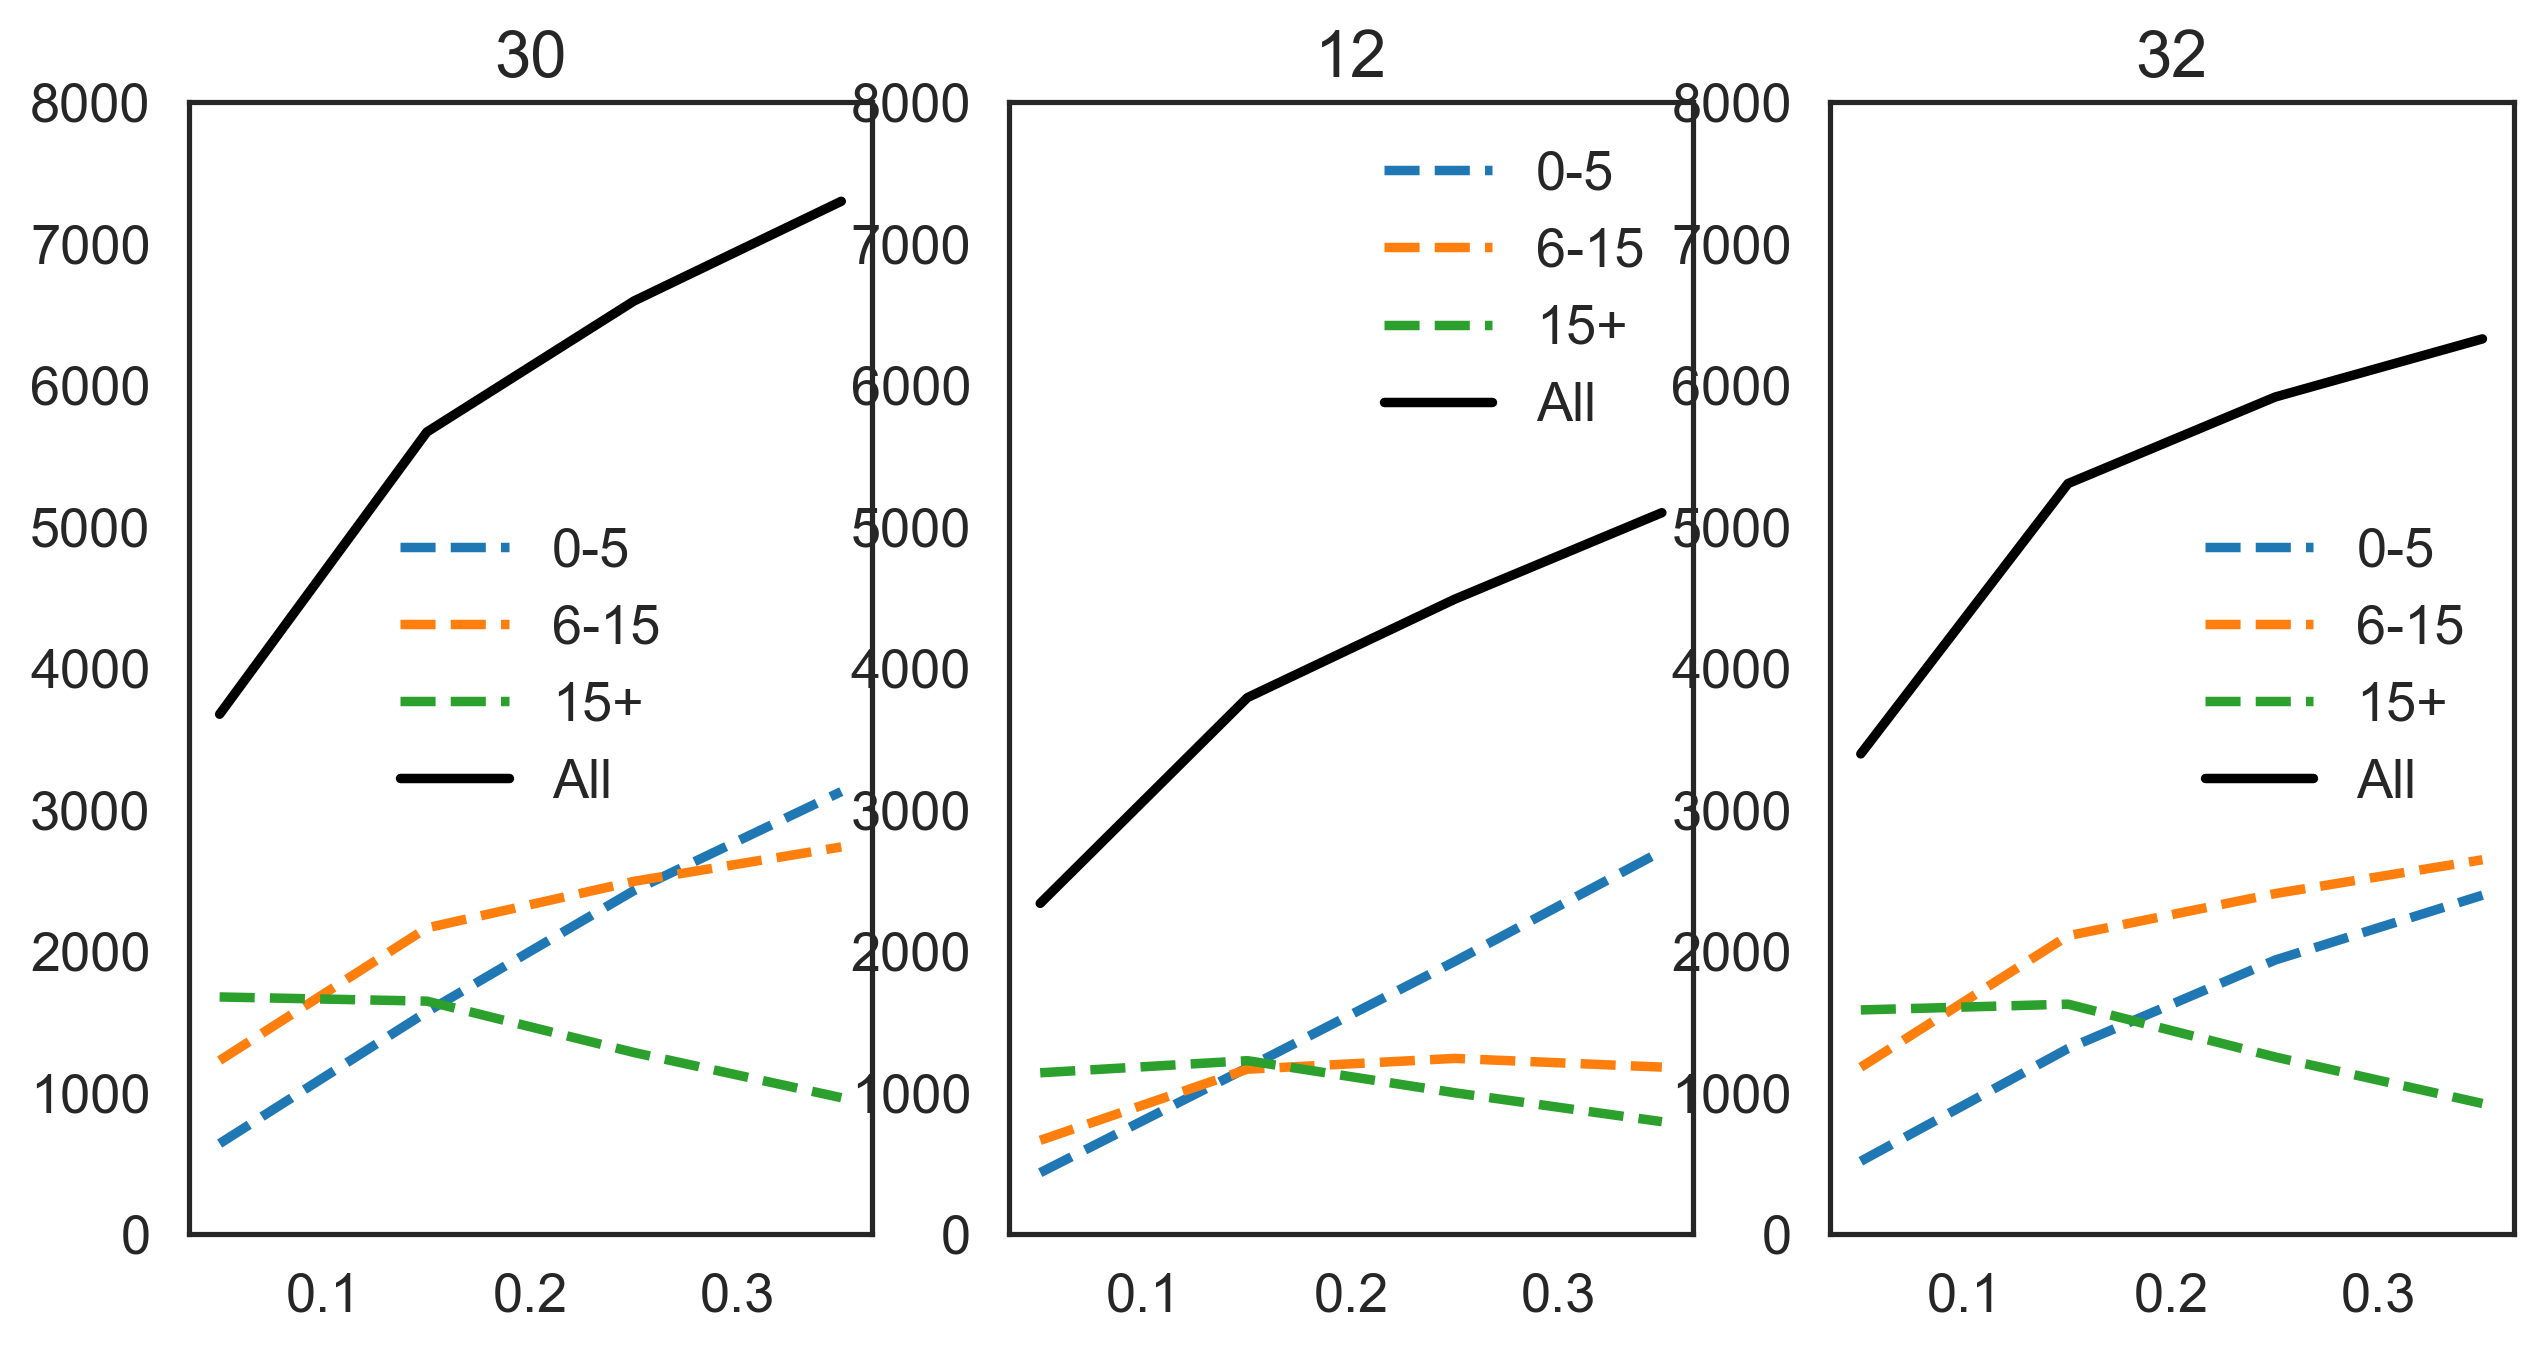

In [205]:
scenario_dict = {
    30: "No IPTsc",
    12: "90% coverage of all school-age kids",
    32: "90% coverage of all u5s"
}

case_type = "clinical"

scenarios = list(scenario_dict.keys())
s_dict = {}
for s in scenarios:
    s_dict[s] = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]
        
plt.figure(dpi=300, figsize=(10,5))
i = 0
for s in scenarios:
    plt.subplot(1,3,i+1)
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence0_5".format(case_type)]*s_dict[s]["pop0_5"], c="C0", linestyle='dashed', label="0-5")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence6_15".format(case_type)]*s_dict[s]["pop6_15"], c="C1", linestyle='dashed', label="6-15")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence16_500".format(case_type)]*s_dict[s]["pop16_500"], c="C2", linestyle='dashed', label="15+")
    plt.plot(s_dict[s]["burnin_approx_pfpr2_10"], s_dict[s]["{}_incidence_all".format(case_type)]*s_dict[s]["pop_all"], c="black", linestyle='solid', label="All")
    i += 1
    plt.ylim([0,8000])
    plt.title(s)
    plt.legend()

In [11]:
def burden_reduction_plot_by_group(scenarios, label_dict, suptitle=None, color_dict=None, linestyle_dict=None):
    plt.close("all")
    plt.figure(dpi=300, figsize=(10,5))
    
    agebins = ["0_5", "6_15","16_500","_all"]
    
    s_dict = {}
    for s in scenarios:
        s_dict[s] = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]
#         s_dict[s] = df[df["scenario_number"]==s]
    
    for i in range(3):
        agebin = agebins[i]
        
        for j in range(2):
            if j == 0:
                case_type = "clinical"
            elif j == 1:
                case_type = "severe"
                
            ax = plt.subplot(2,3,i*3+j)
        
        
            for s in scenarios:
                linestyle='solid'
                c = None
                if s == 30:
                    linestyle='dashed'
                    c = 'gray'
                else:
                    if color_dict:
                        c = color_dict[s]
                    if linestyle_dict:
                        linestyle = linestyle_dict[s]

                x = s_dict[s]["{}_BASELINE".format(metric)]
                y = s_dict[s][metric]
                plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)

        if i == 2:
            plt.legend(fontsize=10)
        plt.xlabel("Baseline prevalence".format(metric))
        plt.ylabel(metric)
#         plt.title(metric)

    plt.suptitle(suptitle)
    plt.tight_layout()
    plt.show()

# Direct effect vs community effect

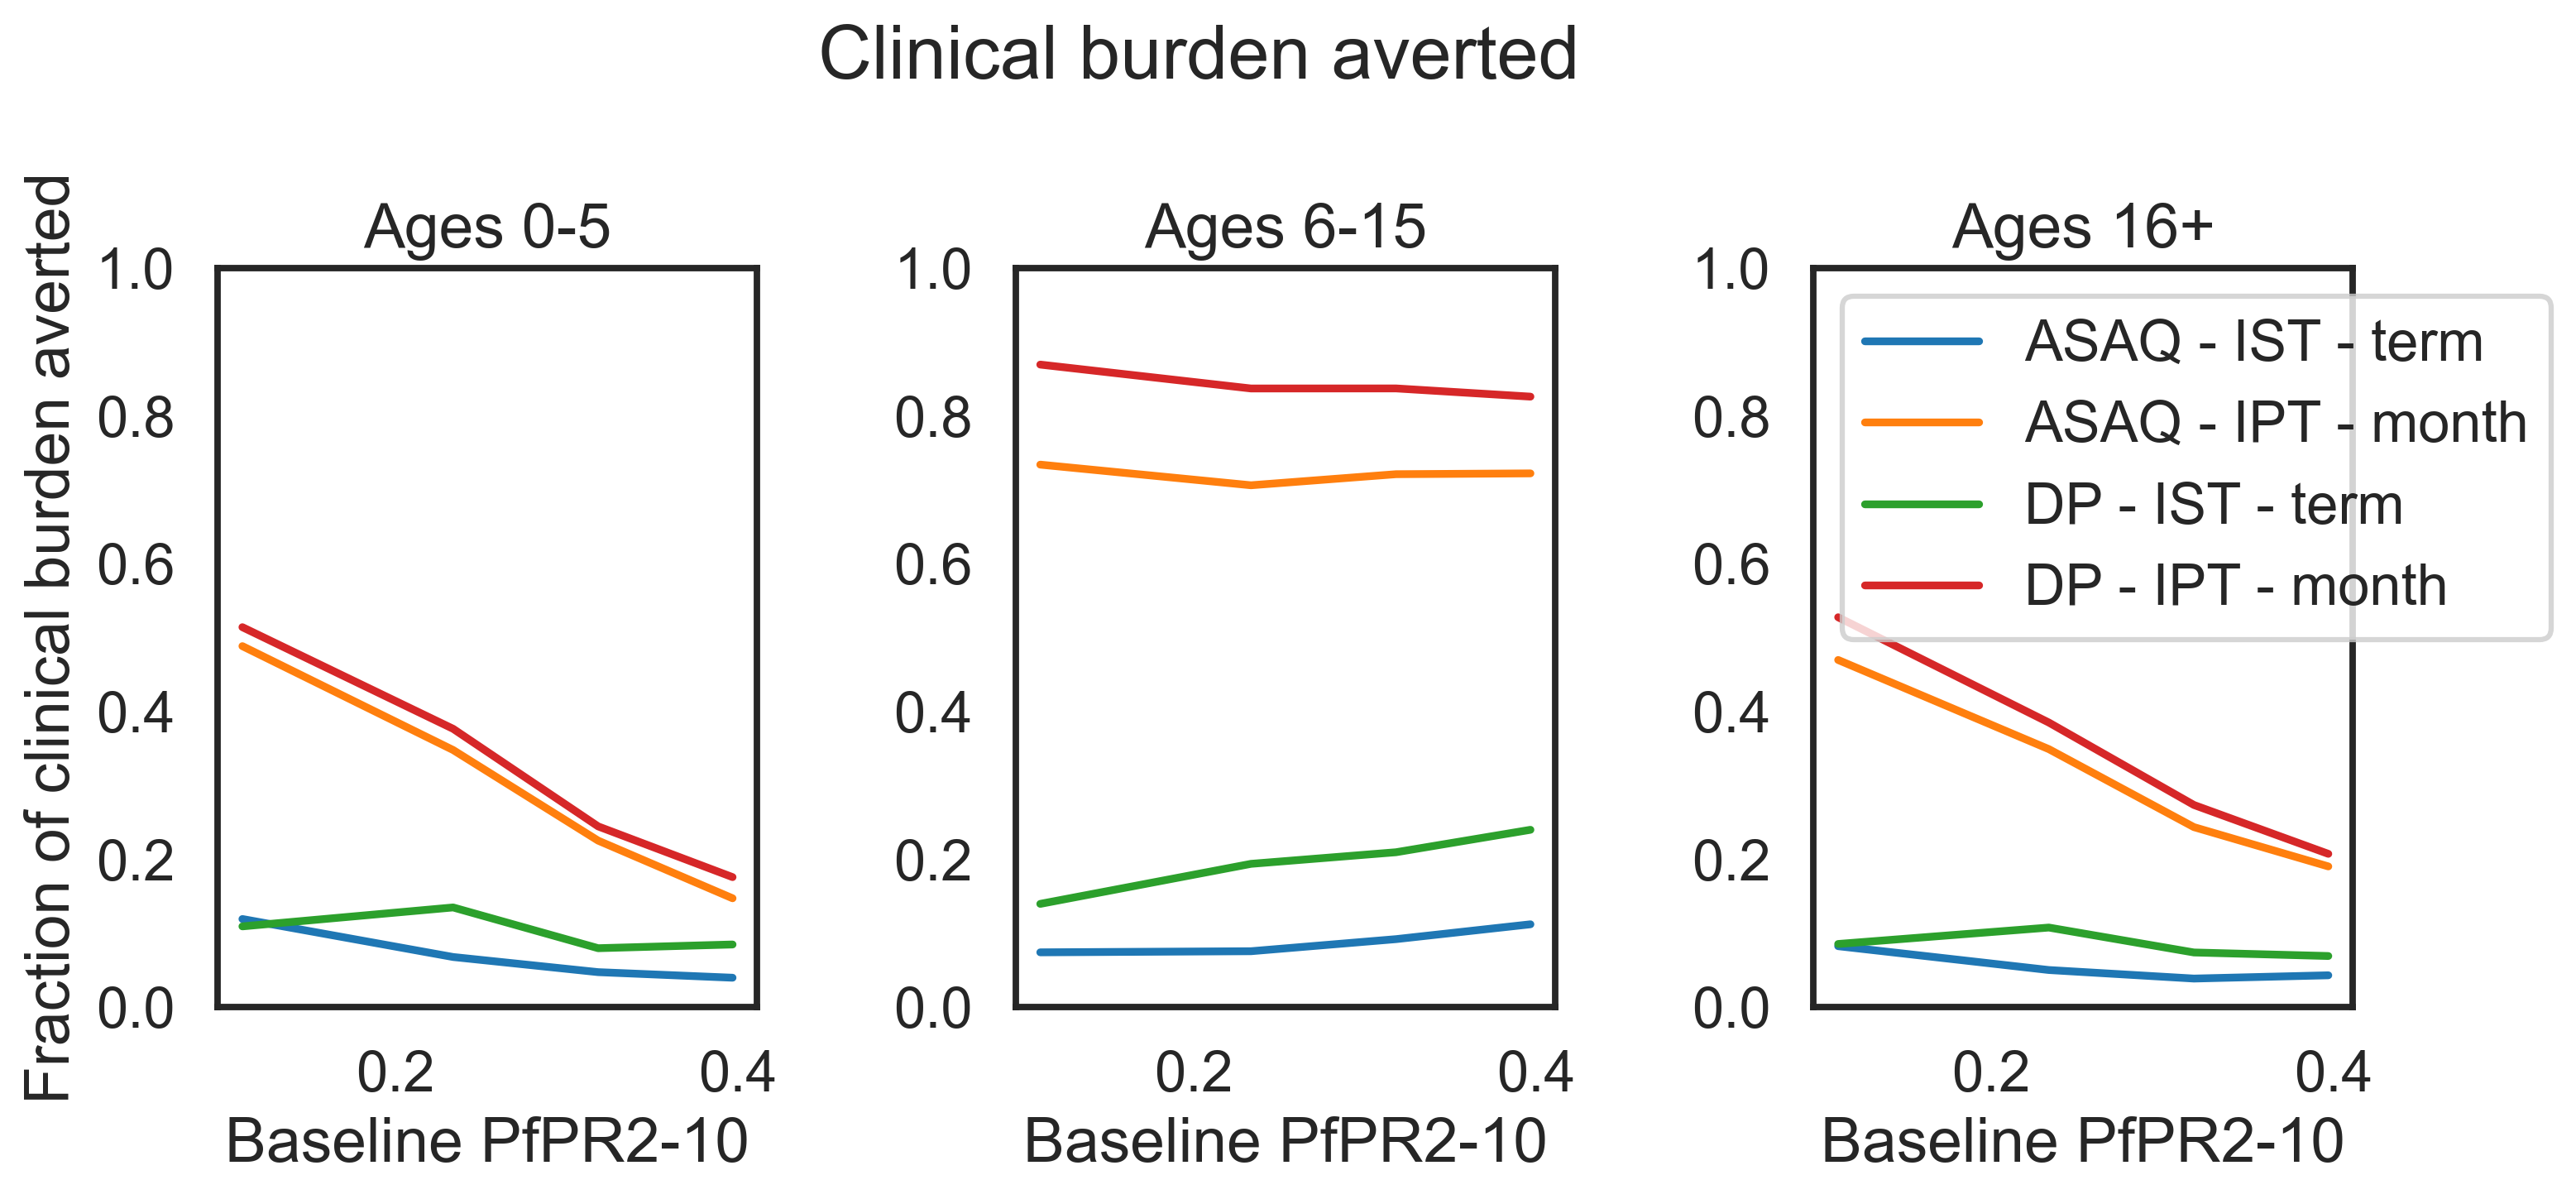

In [19]:
label_dict = {
    7: "ASAQ - IST - term",
    4: "ASAQ - IPT - month",
    19: "DP - IST - term",
    16: "DP - IPT - month",
}

    
    

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]

    
color_dict = {}
for i in range(4):
    color_dict[scenario_list[i]] = "C{}".format(i)
    
    
plt.figure(dpi=300, figsize=(10,5))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["pfpr2_10_BASELINE"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        if i == 2:
            plt.legend()
        if i == 0:
            plt.ylabel("Fraction of clinical burden averted")
        plt.ylim([0,1])
        plt.xlabel("Baseline PfPR2-10")
        plt.title(agebin_label)
plt.suptitle("Clinical burden averted")
plt.tight_layout()

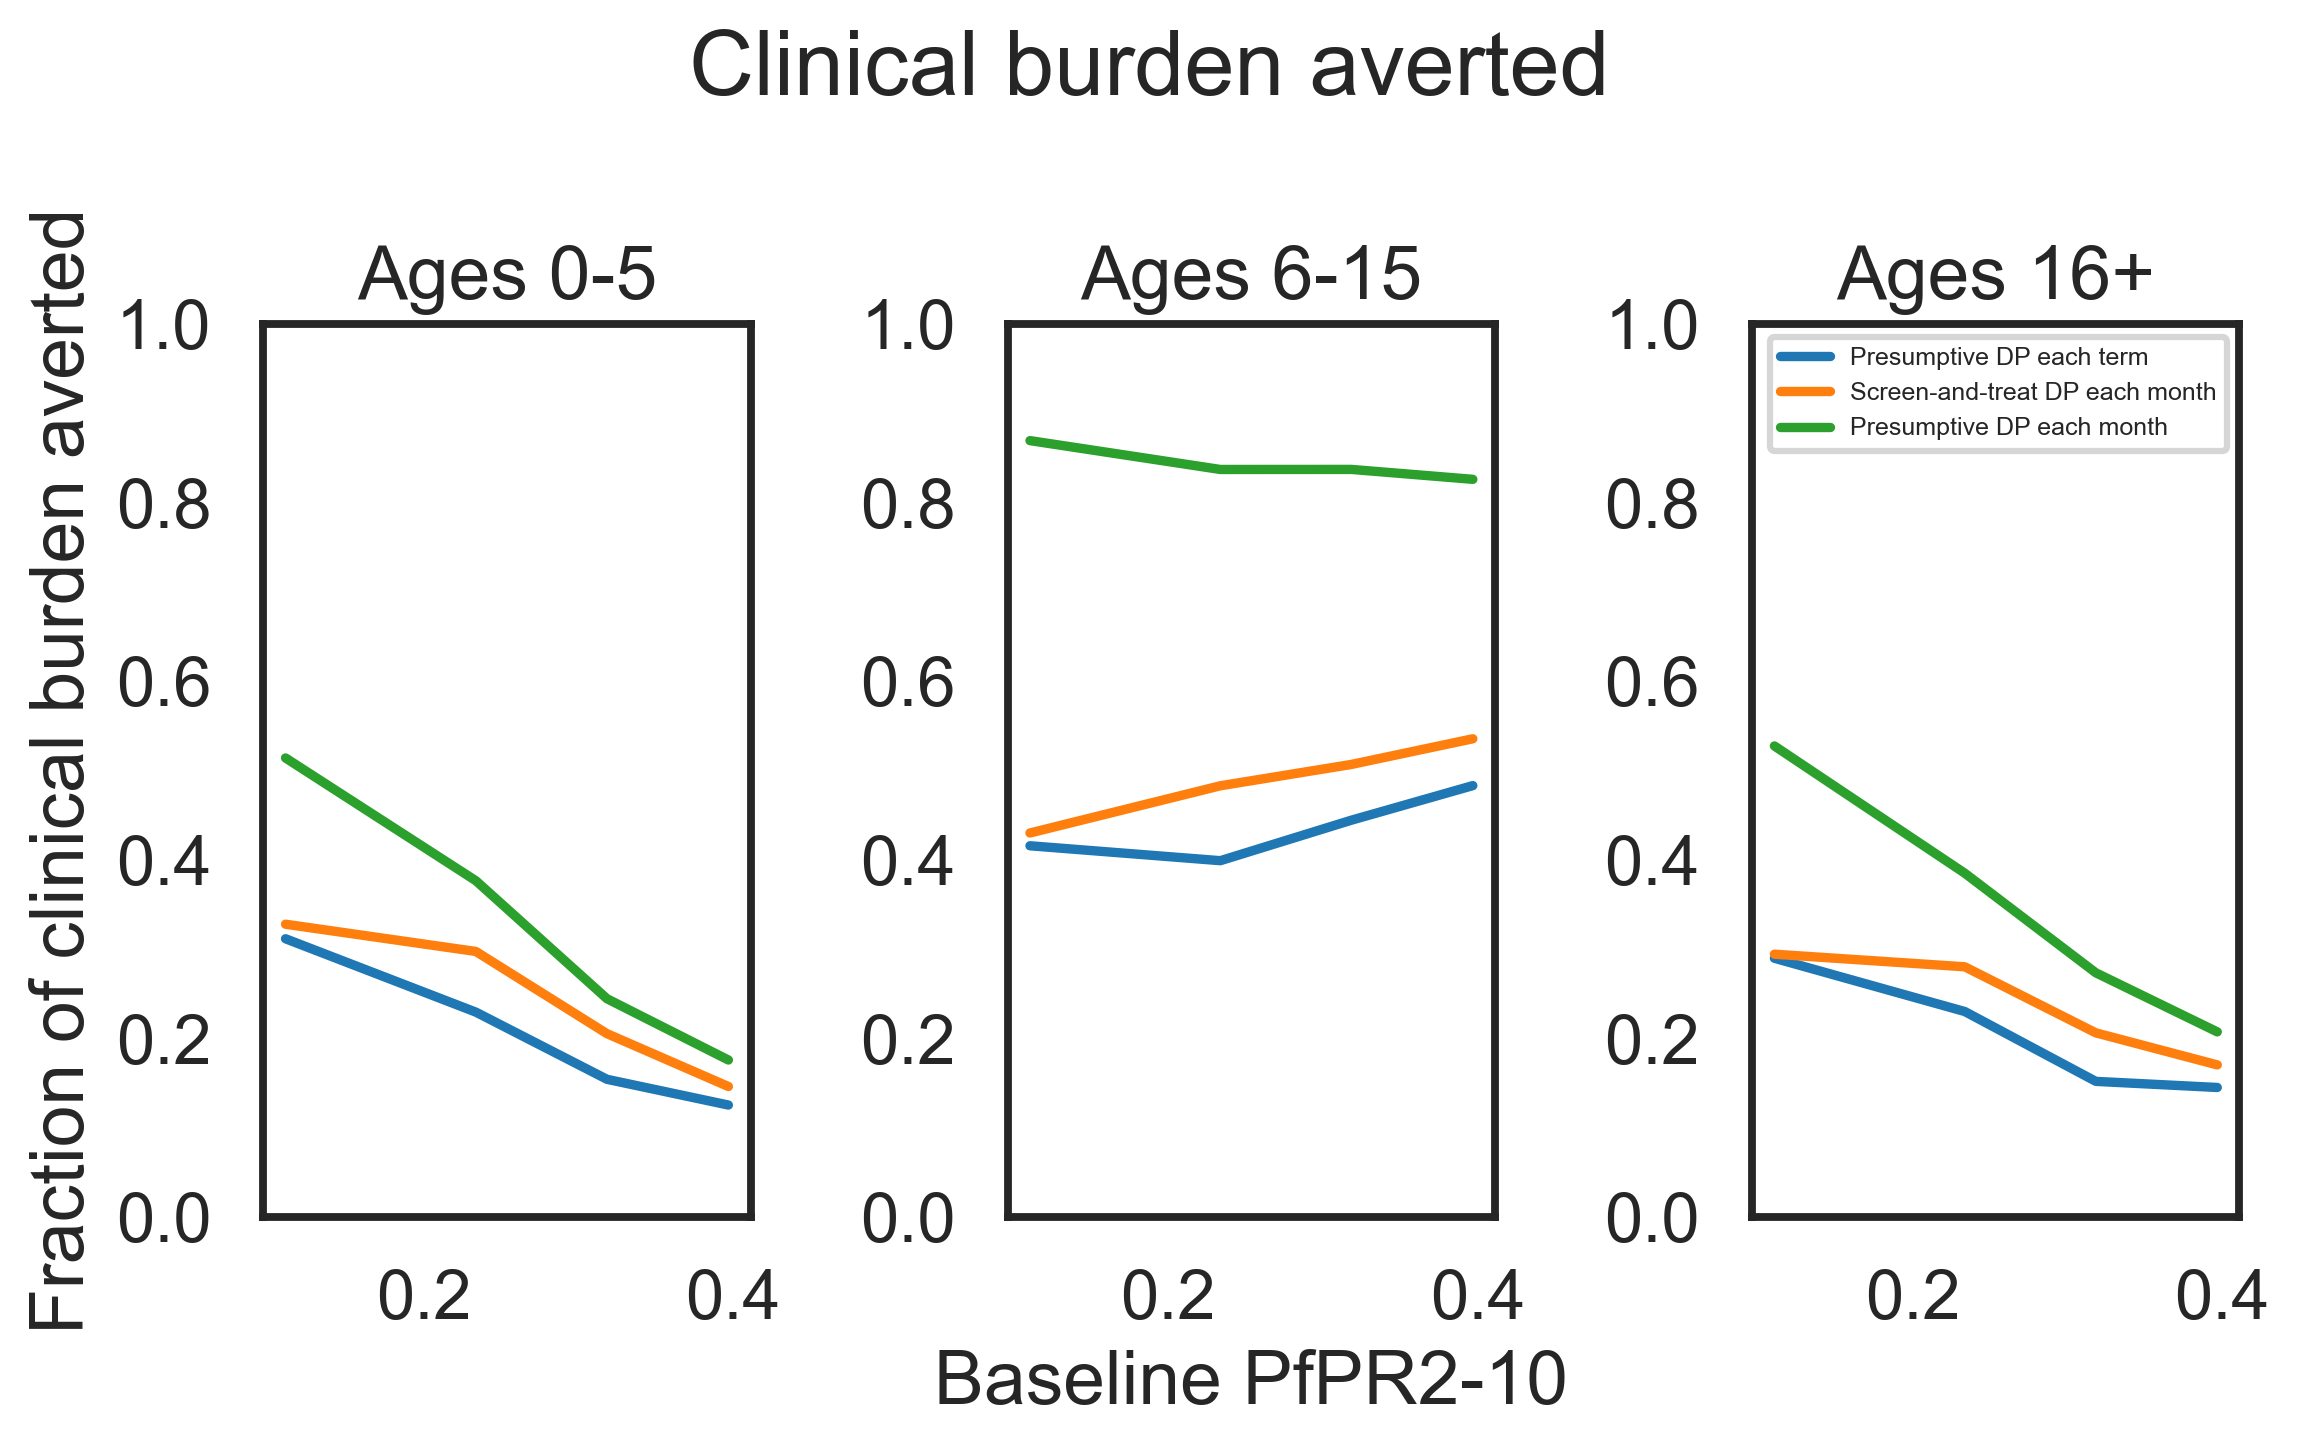

In [61]:
label_dict = {
    13: "Presumptive DP each term",
    22: "Screen-and-treat DP each month",
    16: "Presumptive DP each month",
}

    
    

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]

    
color_dict = {}
for i in range(3):
    color_dict[scenario_list[i]] = "C{}".format(i)
    
    
plt.figure(dpi=300, figsize=(8,5))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["pfpr2_10_BASELINE"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline PfPR2-10")
        if i == 0:
            plt.ylabel("Fraction of clinical burden averted")
        plt.ylim([0,1])
#         plt.xlabel("Baseline PfPR2-10")
        plt.title(agebin_label)
plt.suptitle("Clinical burden averted")
plt.tight_layout()
plt.savefig("figures/2021-04-13_dryrun/community_vs_direct_benefit.pdf")

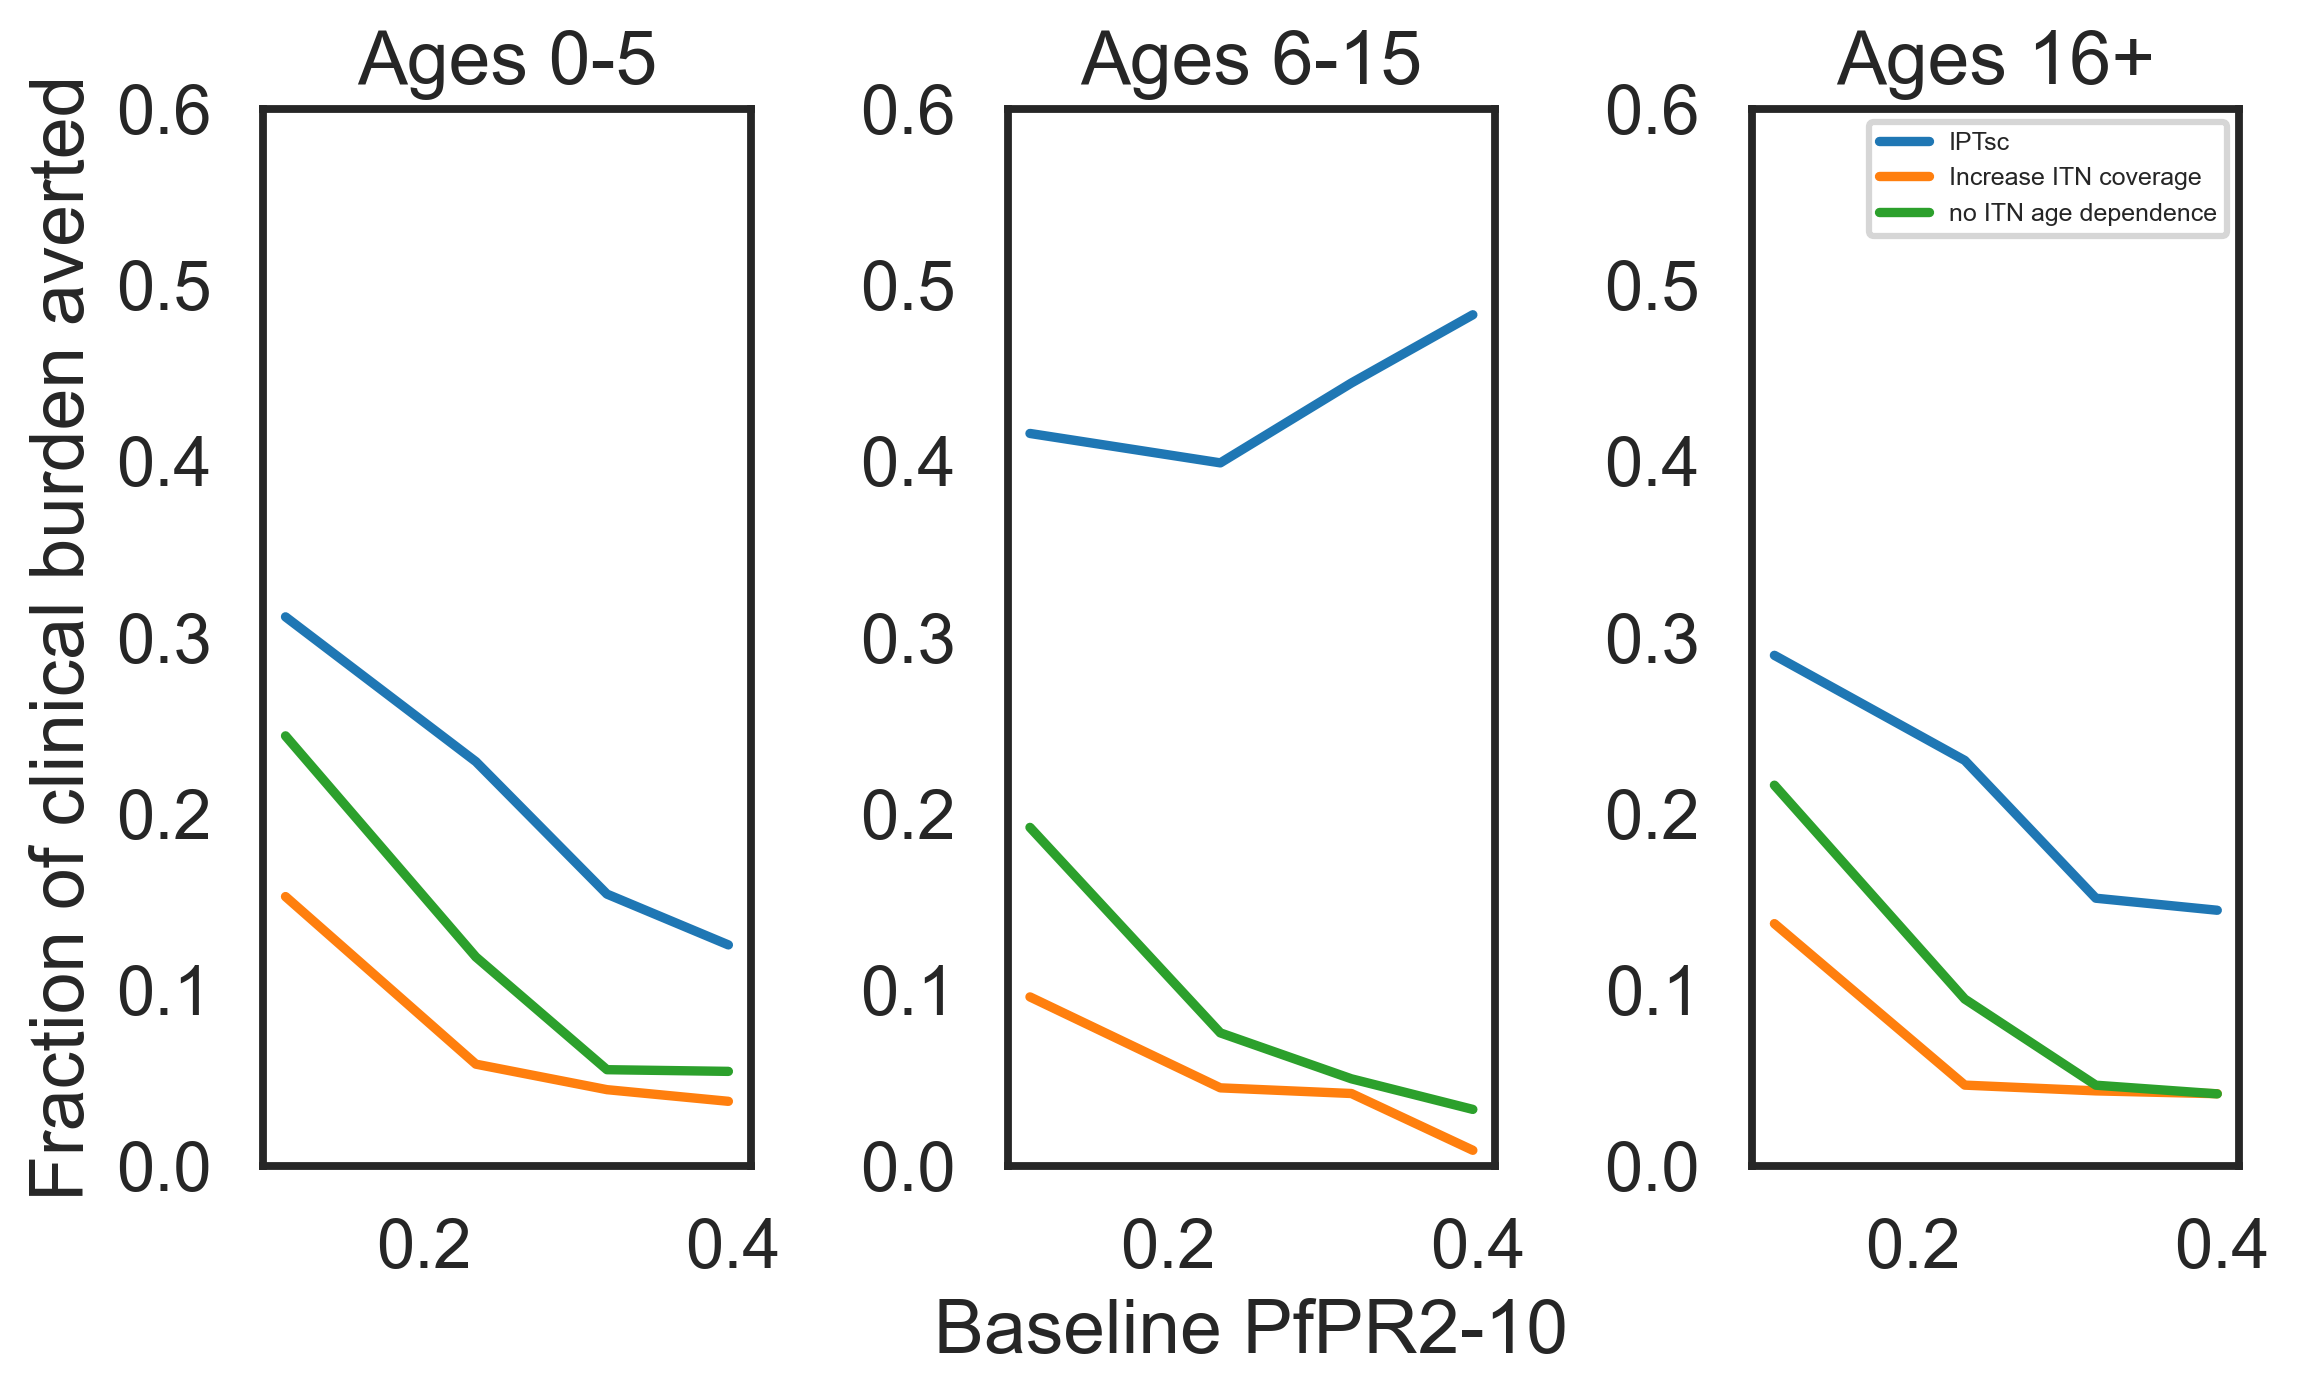

In [71]:
label_dict = {
    13: "IPTsc",
    31: "Increase ITN coverage",
    38: "no ITN age dependence"
}


scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]

    
color_dict = {}
for i in range(len(scenario_list)):
    color_dict[scenario_list[i]] = "C{}".format(i)
    
    
plt.figure(dpi=300, figsize=(8,5))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["pfpr2_10_BASELINE"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        if i == 2:
#             pass
            plt.legend(fontsize=6)

        if i == 1:
            plt.xlabel("Baseline PfPR2-10")
        if i == 0:
            plt.ylabel("Fraction of clinical burden averted")
        plt.ylim([0,0.6])
#         plt.xlabel("Baseline PfPR2-10")
        plt.title(agebin_label)
# plt.suptitle("Clinical burden averted")
plt.tight_layout()
plt.savefig("figures/2021-04-13_dryrun/itn_burden.pdf")

In [80]:
x = df_agg[np.in1d(df_agg["scenario_number"], [31,38])]
old = df_agg[df_agg["scenario_number"]==31].reset_index(drop=True)
new = df_agg[df_agg["scenario_number"]==38].reset_index(drop=True)
ipt = df_agg[df_agg["scenario_number"]==13].reset_index(drop=True)
# print(x[["scenario_number", "burnin_approx_pfpr2_10", "clinical_incidence_all"]])
print(old["clinical_incidence_all"]/new["clinical_incidence_all"])

print(new["clinical_incidence_all"])
print(ipt["clinical_incidence_all"])

0    1.111701
1    1.049314
2    1.012027
3    1.021740
Name: clinical_incidence_all, dtype: float64
0    0.579307
1    1.019380
2    1.253406
3    1.399825
Name: clinical_incidence_all, dtype: float64
0    0.484946
1    0.786236
2    0.965897
3    1.074882
Name: clinical_incidence_all, dtype: float64


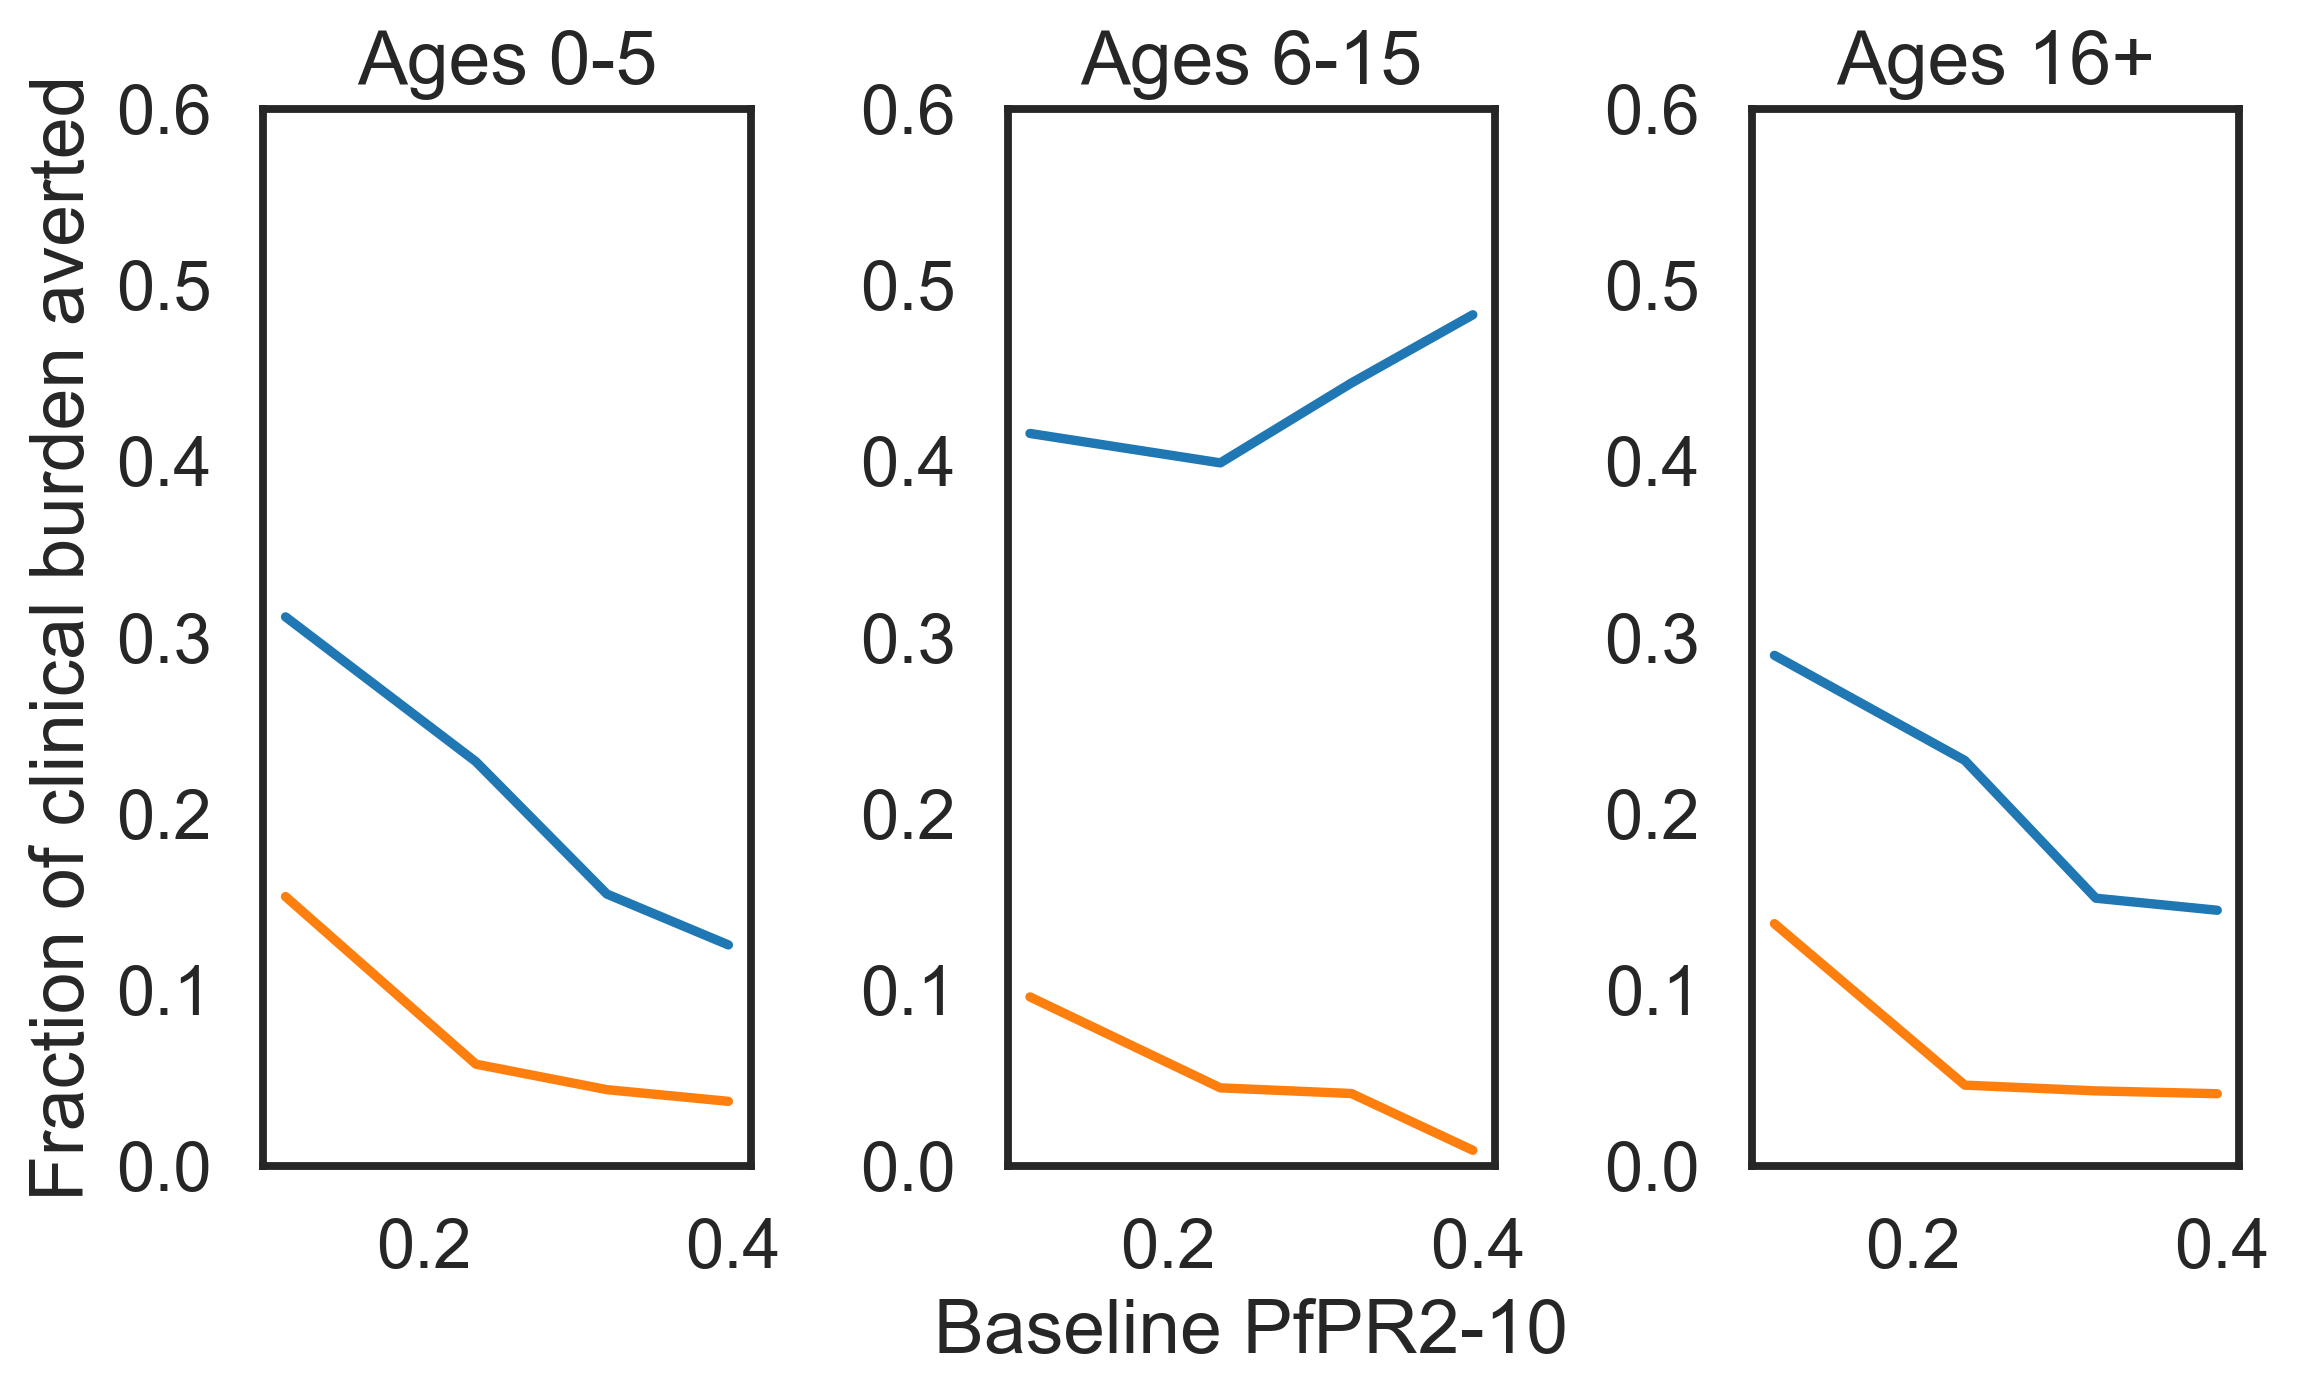

In [60]:
label_dict = {
    13: "IPTsc",
    31: "Increase ITN coverage"
}


scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg_w_baseline_and_burden[df_agg_w_baseline_and_burden["scenario_number"]==s]

    
color_dict = {}
for i in range(len(scenario_list)):
    color_dict[scenario_list[i]] = "C{}".format(i)
    
    
plt.figure(dpi=300, figsize=(8,5))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["pfpr2_10_BASELINE"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        if i == 2:
            pass
#             plt.legend(fontsize=6)

        if i == 1:
            plt.xlabel("Baseline PfPR2-10")
        if i == 0:
            plt.ylabel("Fraction of clinical burden averted")
        plt.ylim([0,0.6])
#         plt.xlabel("Baseline PfPR2-10")
        plt.title(agebin_label)
# plt.suptitle("Clinical burden averted")
plt.tight_layout()
# plt.savefig("figures/2021-04-13_dryrun/community_vs_direct_benefit.pdf")